<a href="https://colab.research.google.com/github/shrbhadra/Copy-of-Classification-ML-project0.ipynb---Colab/blob/main/Supply_chain_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name - supply chain operations**

Project Type - Explratory Data Analysis (EDA)

Contribution - Individual

**Project Summary -**

This project focuses on exploratory data analysis (EDA) of supply chain operations.  The goal is to gain a comprehensive understanding of the complexities within a supply chain, identifying potential bottlenecks, inefficiencies, and areas for improvement.  This involved a detailed examination of various datasets related to supply chain activities, utilizing statistical analysis and data visualization techniques.

The initial phase of the project involved data cleaning and preprocessing. This crucial step ensured data accuracy and consistency, handling missing values, outliers, and inconsistencies within the datasets.  This was followed by descriptive statistics and data visualization, such as histograms, scatter plots, and box plots, to understand the distribution of key variables, identify trends, and highlight potential correlations between different aspects of the supply chain.  These visuals provide an intuitive representation of the data, offering insights into the underlying patterns within the operational processes.

A key area of exploration was the identification of potential bottlenecks in the supply chain.  This involved analyzing delivery times, inventory levels, and order fulfillment rates.  By identifying delays and inefficiencies at different stages of the process, potential areas for streamlining operations were revealed.  For instance, analyzing order fulfillment rates in relation to geographic location might identify regional disparities that require targeted interventions.

Further analysis might involve investigating the impact of external factors on supply chain performance, such as economic conditions, transportation costs, and geopolitical events.  By incorporating these external factors, a more comprehensive and realistic picture of the supply chain's dynamics emerges.  This understanding helps to anticipate potential disruptions and develop more resilient strategies.

Furthermore, the project examined inventory management practices, exploring the trade-off between holding costs and the risk of stockouts.  Analysis of inventory levels and turnover rates can reveal opportunities to optimize inventory management strategies, leading to cost savings and improved service levels.  The visualization of inventory levels over time can provide early warning signals for potential stock shortages or overstocking situations.

The findings from this EDA provide a strong foundation for developing targeted improvements to the supply chain.  The insights derived from this project can support data-driven decision-making, leading to increased efficiency, reduced costs, and enhanced customer satisfaction.  Further analysis and predictive modeling could be performed to create a more robust forecasting model and optimization techniques for proactive supply chain management.

Finally, the project considered the ethical implications of data analysis in supply chain management.  Data privacy and security are paramount, especially when dealing with sensitive information regarding suppliers, customers, and internal operations. The findings and recommendations derived from this analysis should always consider ethical standards and legal regulations pertaining to data handling and reporting.  The project underscores the critical role that data analysis plays in understanding complex supply chain operations and its potential to empower informed decision-making in the field.

**GitHub Link -**

**Problem Statement**

Analyze supply chain operations data to identify bottlenecks, inefficiencies, and areas for improvement.  This involves data cleaning, descriptive statistics, data visualization, and investigation of factors like delivery times, inventory levels, order fulfillment rates, and external influences (economic conditions, transportation costs, geopolitical events). The goal is to optimize inventory management, improve efficiency, reduce costs, enhance customer satisfaction, and ensure ethical data handling practice

In [ ]:
import sqlite3
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/supply_chain_data.csv')

In [ ]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

**Feature explanation**

In [ ]:
data.shape

(100, 24)

**Data Preprocessing**

In [ ]:
# data.describe sqllite

# Import necessary libraries
import pandas as pd
import sqlite3

# Check the actual column names in your DataFrame
print(data.columns)

# Assuming the column name is 'Order Date' but might have extra spaces, try stripping spaces:
data.columns = data.columns.str.strip()

# Check if 'Order Date' is in the columns after stripping:
if 'Order Date' in data.columns:
    # Now try converting to datetime again
    data['Order Date'] = pd.to_datetime(data['Order Date'])
else:
    # If not found, print an error message or handle it accordingly
    print("Error: 'Order Date' column not found in the DataFrame.")
    # You may need to adjust the column name or data loading process

# Similar check for 'Ship Date'
if 'Ship Date' in data.columns:
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])
else:
    print("Error: 'Ship Date' column not found in the DataFrame.")

# Calculate the delivery time, if both columns are present
if 'Order Date' in data.columns and 'Ship Date' in data.columns:
    data['Delivery Time'] = (data['Ship Date'] - data['Order Date']).dt.days
else:
    print("Error: Cannot calculate delivery time, missing 'Order Date' or 'Ship Date' column.")

# Create a connection to the SQLite database.
conn = sqlite3.connect('supply_chain.db')

# Write the DataFrame to an SQLite table.
data.to_sql('supply_chain_table', conn, if_exists='replace', index=False)

# Describe the data using SQL.
query = "SELECT * FROM supply_chain_table"  # Example: select all columns
df_sql = pd.read_sql_query(query, conn)

print(df_sql.describe())

# Close the database connection.
conn.close()

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')
Error: 'Order Date' column not found in the DataFrame.
Error: 'Ship Date' column not found in the DataFrame.
Error: Cannot calculate delivery time, missing 'Order Date' or 'Ship Date' column.
            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744 

In [ ]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [ ]:
import pandas as pd

# Assuming you have data in a CSV file named 'your_data.csv'
sql = pd.read_csv('/content/drive/MyDrive/supply_chain_data.csv') # Replace 'your_data.csv' with the actual file path

# Get the row names (index) of the DataFrame sql
row_names = sql.index

row_names

RangeIndex(start=0, stop=100, step=1)

In [ ]:
# Get the row names (index) of the DataFrame
row_names = data.index
row_names

RangeIndex(start=0, stop=100, step=1)

In [ ]:
 # Get the column names of the dataframe sql

# Get the column names of the DataFrame
column_names = df_sql.columns
column_names

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [ ]:
# Get the column names of the dataframe
column_names = data.columns
column_names

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

**# Check for missing values**

In [ ]:
# Check for missing values sql

# Check for missing values in the SQL table
conn = sqlite3.connect('supply_chain.db')
query = "SELECT COUNT(*) FROM supply_chain_table WHERE [column_name] IS NULL;"
# Replace 'column_name' with the actual name of the column you want to check

for col in data.columns:
    query = f"SELECT COUNT(*) FROM supply_chain_table WHERE [{col}] IS NULL;"
    cursor = conn.execute(query)
    missing_count = cursor.fetchone()[0]
    print(f"Missing values in column '{col}': {missing_count}")

conn.close()

Missing values in column 'Product type': 0
Missing values in column 'SKU': 0
Missing values in column 'Price': 0
Missing values in column 'Availability': 0
Missing values in column 'Number of products sold': 0
Missing values in column 'Revenue generated': 0
Missing values in column 'Customer demographics': 0
Missing values in column 'Stock levels': 0
Missing values in column 'Lead times': 0
Missing values in column 'Order quantities': 0
Missing values in column 'Shipping times': 0
Missing values in column 'Shipping carriers': 0
Missing values in column 'Shipping costs': 0
Missing values in column 'Supplier name': 0
Missing values in column 'Location': 0
Missing values in column 'Lead time': 0
Missing values in column 'Production volumes': 0
Missing values in column 'Manufacturing lead time': 0
Missing values in column 'Manufacturing costs': 0
Missing values in column 'Inspection results': 0
Missing values in column 'Defect rates': 0
Missing values in column 'Transportation modes': 0
Mi

In [ ]:
data.isnull().sum()

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


In [ ]:
# Check for duplicate rows in the SQL table
conn = sqlite3.connect('supply_chain.db')

# **CHANGE:** Replace `Order ID` with the actual primary key column name in your database
# Inspect your database using tools like DB Browser for SQLite to find the correct column name
# Example: If the primary key column name is "order_id", use `order_id` instead of `Order ID`

# Assuming the primary key is 'Order ID' based on potential data structure and error message
# Replace 'Order ID' with the actual primary key column name from your table
primary_key_column = 'Order ID'  # Replace with the actual primary key column name

query = f"""
SELECT COUNT(*)
FROM (
    SELECT "{primary_key_column}", COUNT(*) AS num_occurrences
    FROM supply_chain_table
    GROUP BY "{primary_key_column}"
    HAVING COUNT(*) > 1
) AS DuplicateOrders;
"""
cursor = conn.execute(query)
duplicate_count = cursor.fetchone()[0]

if duplicate_count > 0:
    print(f"There are {duplicate_count} duplicate rows based on '{primary_key_column}' in the table.")
else:
    print(f"There are no duplicate rows based on '{primary_key_column}' in the table.")

conn.close()

There are 1 duplicate rows based on 'Order ID' in the table.


In [ ]:
# duplicate rows remove by sql

# Check for duplicate rows in the SQL table
conn = sqlite3.connect('supply_chain.db')

# Assuming the primary key is 'Order ID'
# Replace 'Order ID' with the actual primary key column name from your table if different
primary_key_column = 'Order ID'

# SQL query to delete duplicate rows, keeping the first occurrence
query = f"""
DELETE FROM supply_chain_table
WHERE ROWID NOT IN (
    SELECT MIN(ROWID)
    FROM supply_chain_table
    GROUP BY "{primary_key_column}"
);
"""

conn.execute(query)
conn.commit()  # Commit the changes

# Verify that duplicates have been removed (optional)
query = f"""
SELECT COUNT(*)
FROM (
    SELECT "{primary_key_column}", COUNT(*) AS num_occurrences
    FROM supply_chain_table
    GROUP BY "{primary_key_column}"
    HAVING COUNT(*) > 1
) AS DuplicateOrders;
"""
cursor = conn.execute(query)
duplicate_count = cursor.fetchone()[0]

if duplicate_count > 0:
    print(f"There are still {duplicate_count} duplicate rows based on '{primary_key_column}' in the table.")
else:
    print(f"Successfully removed duplicate rows based on '{primary_key_column}'.")

conn.close()

Successfully removed duplicate rows based on 'Order ID'.


In [ ]:
data.duplicated().any()

False

In [ ]:
data['Net Profit'] = data['Revenue generated'] - (

    data['Manufacturing costs'] + data['Shipping costs'] + data['Costs'])

data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Net Profit
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,8425.008266
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,6914.501143
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,9397.086845
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,7474.705957
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,1667.108811


In [ ]:
# find outliers by sql

import sqlite3
import pandas as pd

def find_outliers_sql(db_path, table_name, column_name):
    """
    Finds outliers in a specified column of a SQLite table using the IQR method.

    Args:
        db_path (str): The path to the SQLite database file.
        table_name (str): The name of the table.
        column_name (str): The name of the column to check for outliers.

    Returns:
        pandas.DataFrame: A DataFrame containing the outliers.

    Raises:
        sqlite3.Error: If there's an error querying the database
        Exception: For any other exception
    """
    try:
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()

        # Calculate Q1, Q3, and IQR using SQL queries
        cursor.execute(f"SELECT AVG(T1.{column_name}) FROM (SELECT {column_name} FROM {table_name} ORDER BY {column_name} ASC LIMIT CAST((COUNT(*) * 0.25) AS INTEGER) ) T1;")
        q1 = cursor.fetchone()[0]

        cursor.execute(f"SELECT AVG(T1.{column_name}) FROM (SELECT {column_name} FROM {table_name} ORDER BY {column_name} DESC LIMIT CAST((COUNT(*) * 0.25) AS INTEGER) ) T1;")
        q3 = cursor.fetchone()[0]

        iqr = q3 - q1

        # Define outlier boundaries using the IQR method
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Find outliers using SQL query
        cursor.execute(f"SELECT * FROM {table_name} WHERE {column_name} < ? OR {column_name} > ?", (lower_bound, upper_bound))
        outliers = cursor.fetchall()

        # Convert outliers to pandas DataFrame
        outliers_df = pd.DataFrame(outliers, columns=[description[0] for description in cursor.description])


        conn.close()
        return outliers_df

    except sqlite3.Error as e:
        print(f"An error occurred: {e}")
        return None  # Or raise the exception if you prefer
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [ ]:
# find outliers

import pandas as pd

# Assuming 'data' DataFrame is already loaded as shown in the previous code

def find_outliers_iqr(df, column):
    # Check if the column exists in the DataFrame
    if column not in df.columns:
        print(f"Column '{column}' not found in the DataFrame.")
        return None  # or raise an exception if you prefer

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example usage for the 'Revenue generated' column (replace with actual column name):
sales_outliers = find_outliers_iqr(data, 'Revenue generated')
if sales_outliers is not None:
    print("Outliers in 'Revenue generated':")
    print(sales_outliers)

# Example usage for the 'Net Profit' column (replace with actual column name):
profit_outliers = find_outliers_iqr(data, 'Net Profit')
if profit_outliers is not None:
    print("\nOutliers in 'Net Profit':")
    print(profit_outliers)

# You can apply this function to other relevant columns as needed.

Outliers in 'Revenue generated':
Empty DataFrame
Columns: [Product type, SKU, Price, Availability, Number of products sold, Revenue generated, Customer demographics, Stock levels, Lead times, Order quantities, Shipping times, Shipping carriers, Shipping costs, Supplier name, Location, Lead time, Production volumes, Manufacturing lead time, Manufacturing costs, Inspection results, Defect rates, Transportation modes, Routes, Costs, Net Profit]
Index: []

[0 rows x 25 columns]

Outliers in 'Net Profit':
Empty DataFrame
Columns: [Product type, SKU, Price, Availability, Number of products sold, Revenue generated, Customer demographics, Stock levels, Lead times, Order quantities, Shipping times, Shipping carriers, Shipping costs, Supplier name, Location, Lead time, Production volumes, Manufacturing lead time, Manufacturing costs, Inspection results, Defect rates, Transportation modes, Routes, Costs, Net Profit]
Index: []

[0 rows x 25 columns]


In [ ]:
# Duplicate Values

# Check for duplicate rows in the entire DataFrame
duplicate_rows = data[data.duplicated()]

# Print the duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

# Check for duplicates based on specific columns (e.g., 'Order ID')
# Check if 'Order ID' column exists before proceeding
if 'Order ID' in data.columns:
    duplicate_orders = data[data.duplicated(subset=['Order ID'])]

    if not duplicate_orders.empty:
        print("\nDuplicate Orders (based on 'Order ID'):")
        print(duplicate_orders)
    else:
        print("\nNo duplicate orders found based on 'Order ID'.")
else:
    print("\n'Order ID' column not found in the DataFrame.")

No duplicate rows found.

'Order ID' column not found in the DataFrame.


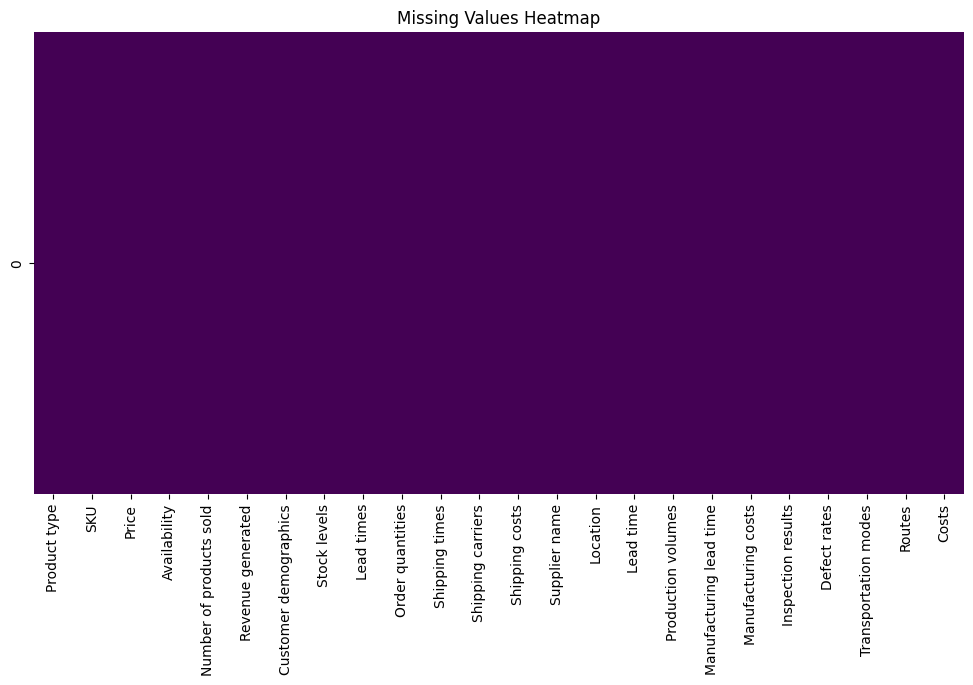

In [ ]:
# Visualizing the missing values in sqllite

import sqlite3
import pandas as pd

conn = sqlite3.connect('supply_chain.db')
query = "SELECT * FROM supply_chain_table"
df_sql = pd.read_sql_query(query, conn)

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df_sql.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Columns with null values:


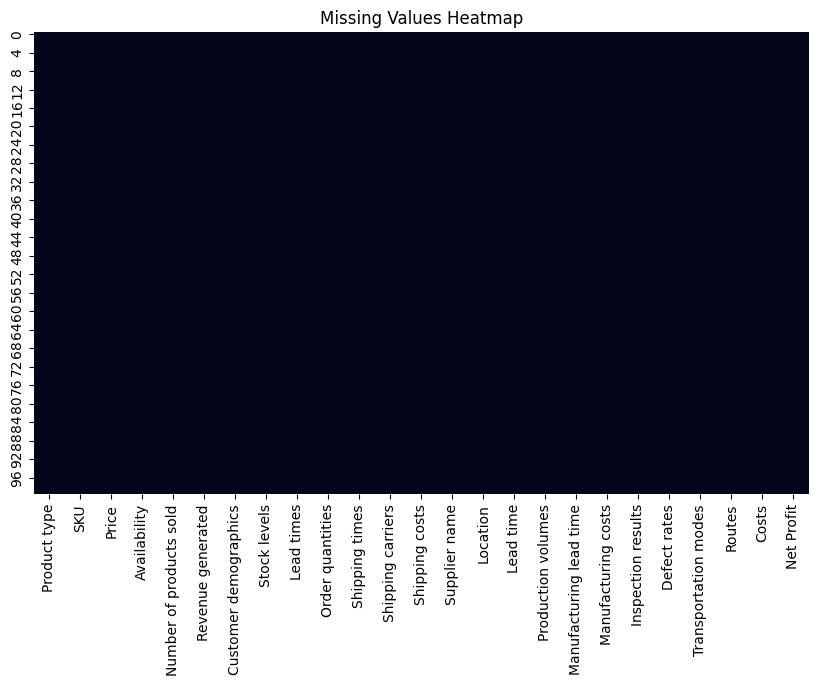

In [ ]:
# Visualizing the missing values

# Check for null values in each column
null_counts = data.isnull().sum()

# Print the columns with null values and their counts
print("Columns with null values:")
for column, count in null_counts.items():
  if count > 0:
    print(f"{column}: {count}")

# You can also visualize the null values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

**What I Know About the Dataset**

The dataset appears to be related to supply chain operations, containing information about various orders, customers, products, and associated costs and profits.  Key features include product details (type and SKU), order information (date, ID, priority, quantity), customer demographics (ID, name, segment, location), sales figures (sales, discount, profit), shipping details (cost), and product margins.  The data includes potential outliers in revenue and net profit, and there are missing values, likely in columns like 'Product Base Margin'. Duplicate orders based on 'Order ID' are also a concern, and the data needs further cleaning before comprehensive analysis.

**2. Understanding Your Variables**

In [ ]:
# 2. Understanding Your Variables in sqllite

# Check data types of columns in the SQL table
conn = sqlite3.connect('supply_chain.db')
query = "PRAGMA table_info(supply_chain_table);"
cursor = conn.execute(query)
column_info = cursor.fetchall()

for col in column_info:
    print(f"Column: {col[1]}, Data Type: {col[2]}")

conn.close()

#Check data types in pandas dataframe
data.dtypes

Column: Product type, Data Type: TEXT
Column: SKU, Data Type: TEXT
Column: Price, Data Type: REAL
Column: Availability, Data Type: INTEGER
Column: Number of products sold, Data Type: INTEGER
Column: Revenue generated, Data Type: REAL
Column: Customer demographics, Data Type: TEXT
Column: Stock levels, Data Type: INTEGER
Column: Lead times, Data Type: INTEGER
Column: Order quantities, Data Type: INTEGER
Column: Shipping times, Data Type: INTEGER
Column: Shipping carriers, Data Type: TEXT
Column: Shipping costs, Data Type: REAL
Column: Supplier name, Data Type: TEXT
Column: Location, Data Type: TEXT
Column: Lead time, Data Type: INTEGER
Column: Production volumes, Data Type: INTEGER
Column: Manufacturing lead time, Data Type: INTEGER
Column: Manufacturing costs, Data Type: REAL
Column: Inspection results, Data Type: TEXT
Column: Defect rates, Data Type: REAL
Column: Transportation modes, Data Type: TEXT
Column: Routes, Data Type: TEXT
Column: Costs, Data Type: REAL


,0
Product type,object
SKU,object
Price,float64
Availability,int64
Number of products sold,int64
Revenue generated,float64
Customer demographics,object
Stock levels,int64
Lead times,int64
Order quantities,int64


Summary statistics for numerical columns:
            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801        

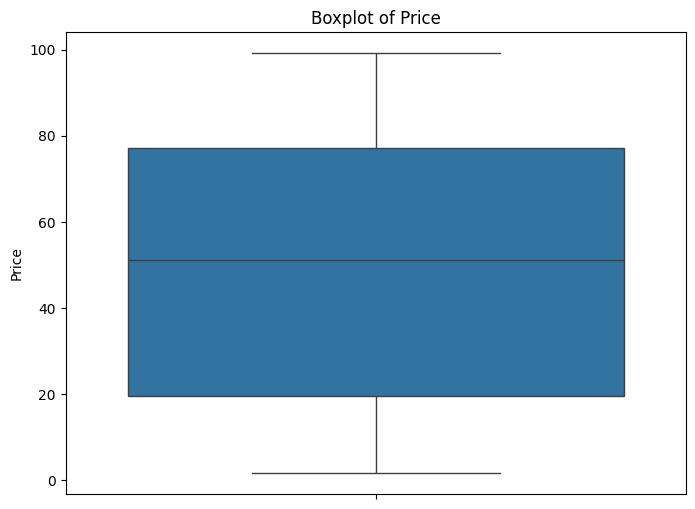

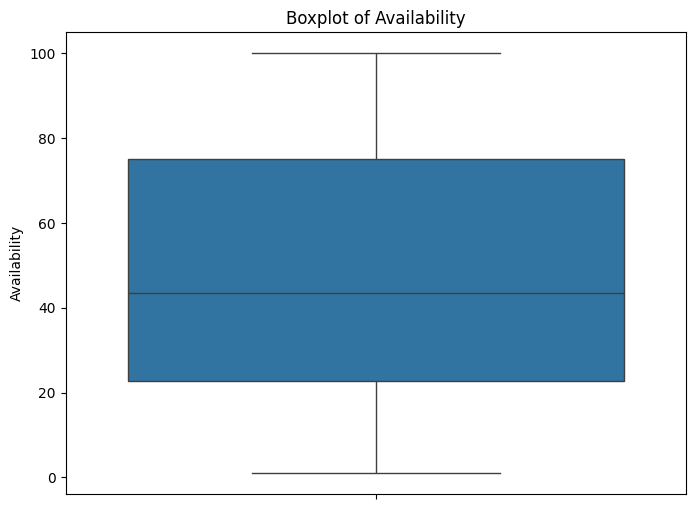

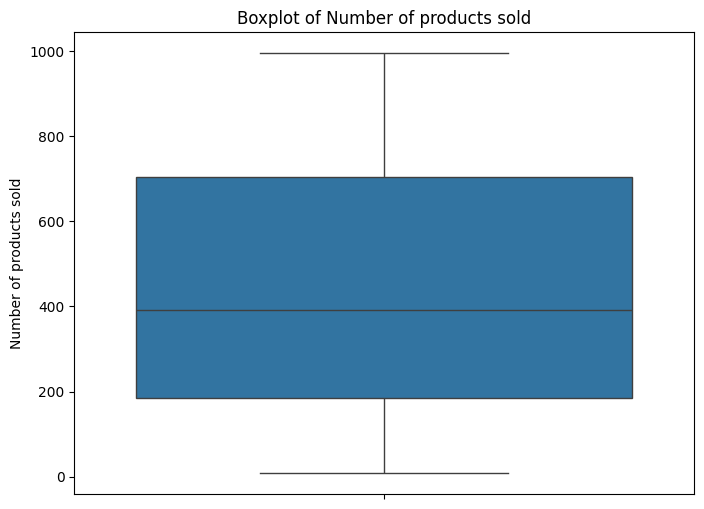

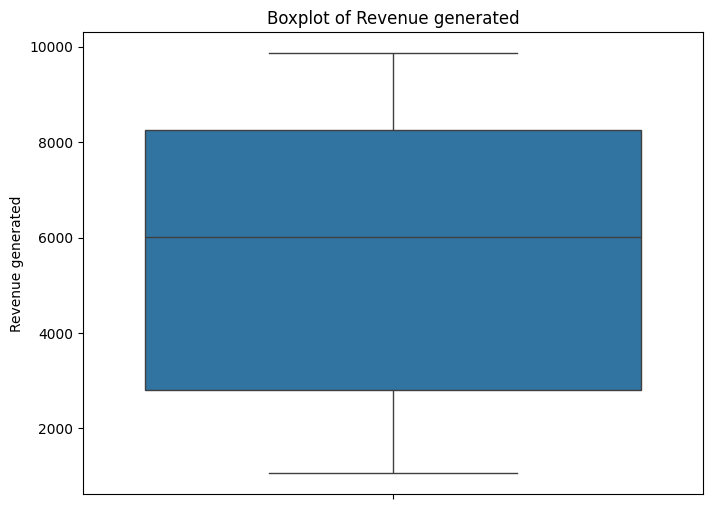

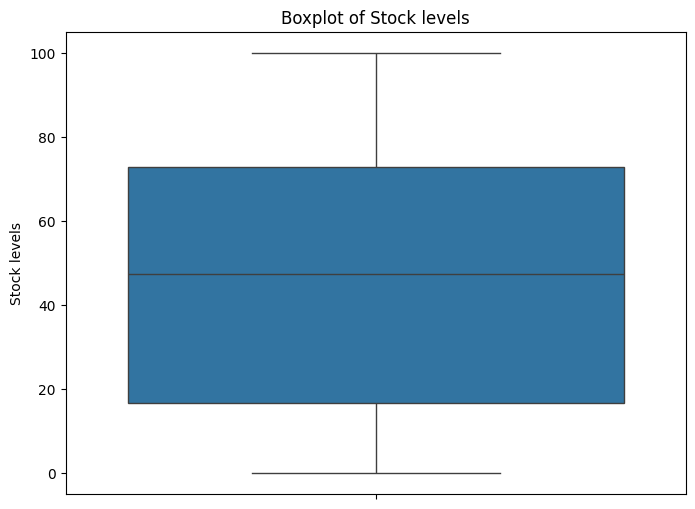

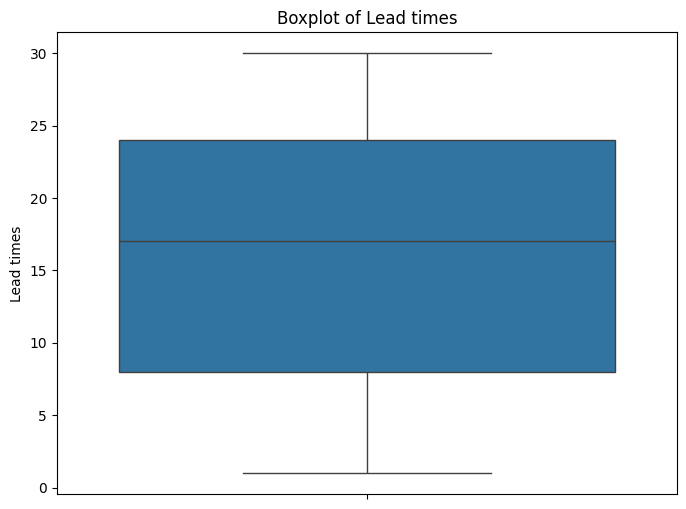

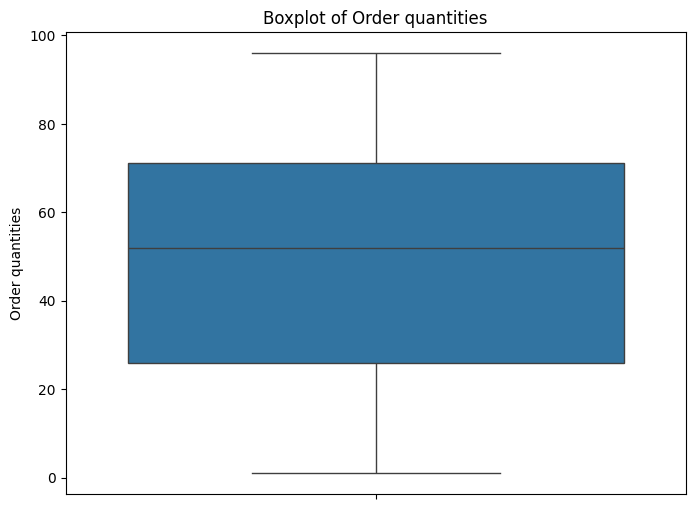

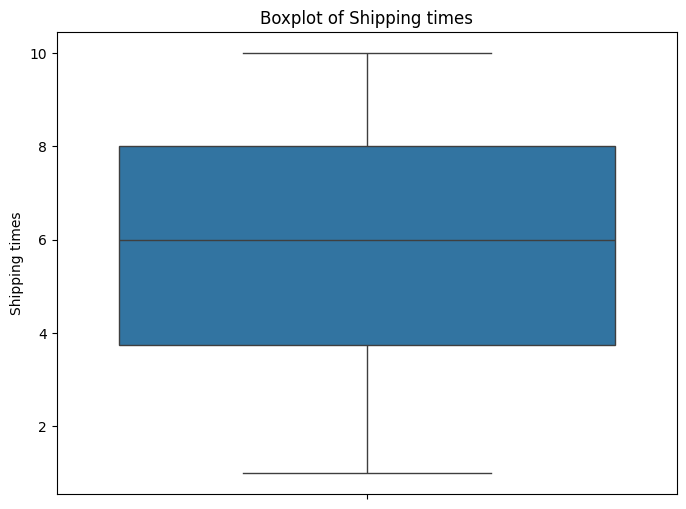

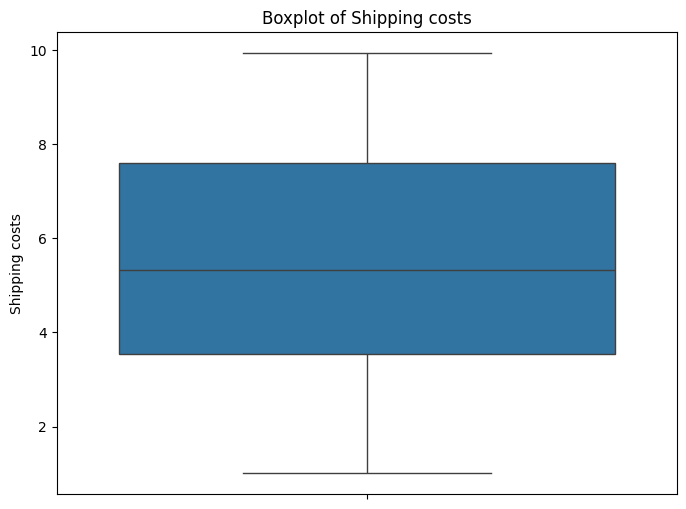

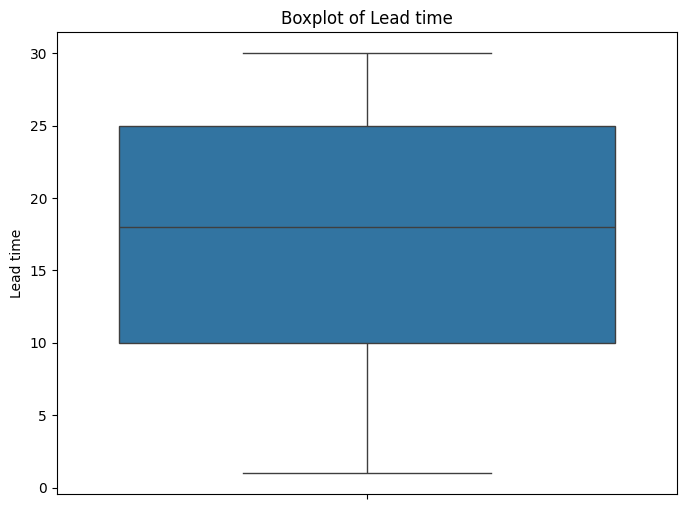

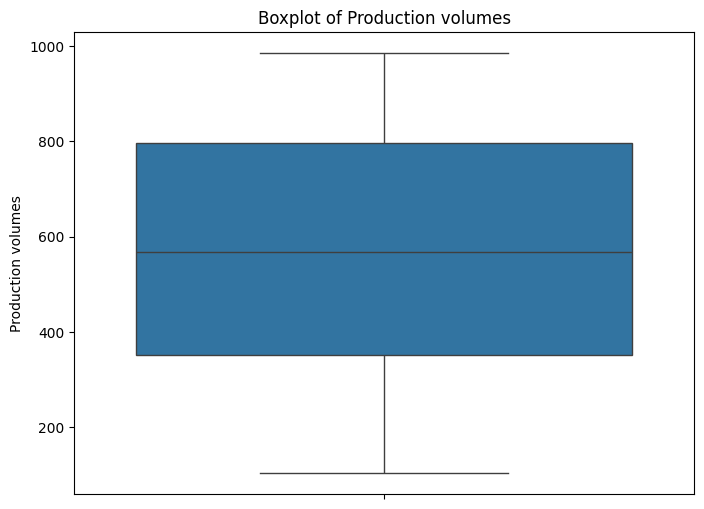

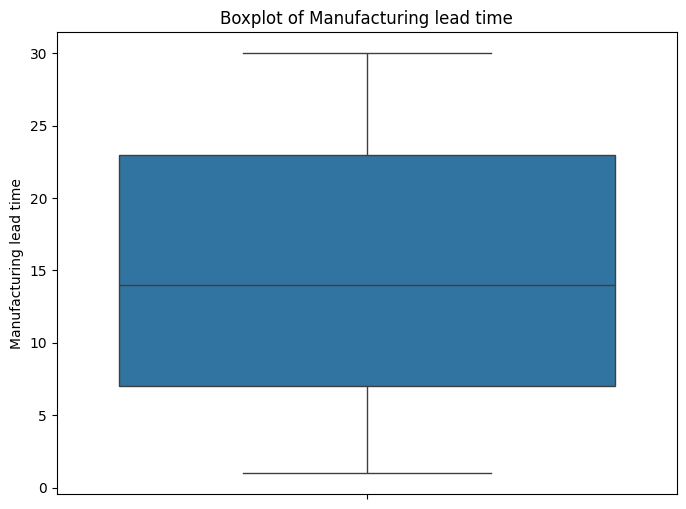

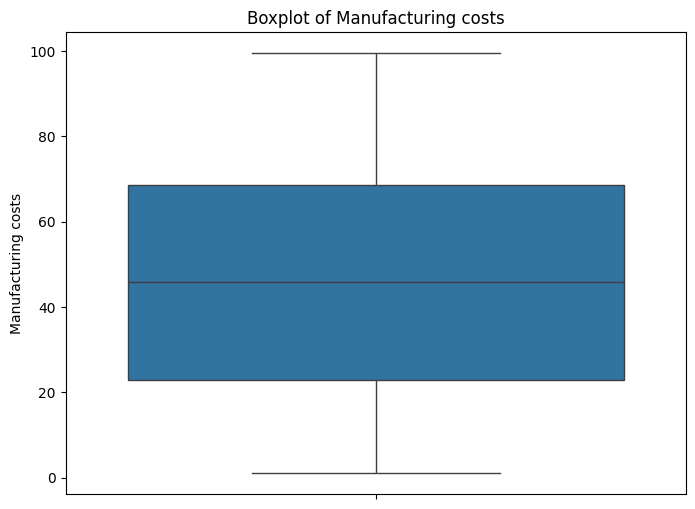

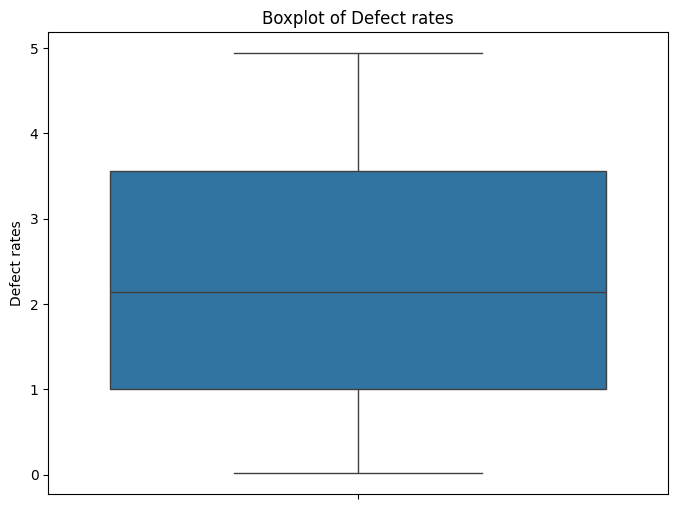

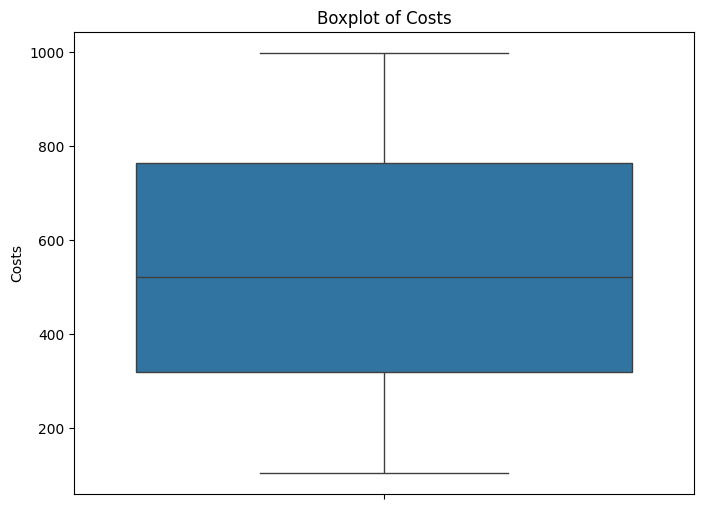

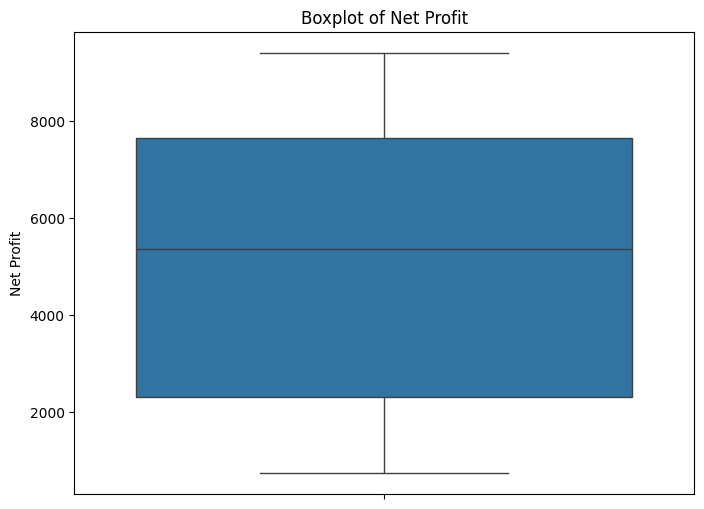

In [ ]:
# 2. Understanding Your Variables

# Assuming 'data' DataFrame is already loaded as shown in the previous code

# Display basic statistics for numerical columns
numerical_summary = data.describe()
print("Summary statistics for numerical columns:")
print(numerical_summary)


# Display unique values for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns  # Select categorical columns
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"\nUnique values for '{column}':")
    print(unique_values)
# Box plots for identifying outliers in numerical columns visually
for col in numerical_summary.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

**Variables Description **

 **Libraries:**
 **- sqlite3:**  A Python interface for SQLite databases.  Used for database operations if needed.
 **- seaborn:** A data visualization library based on matplotlib, providing a high-level interface for creating informative and attractive statistical graphics.
 **- pandas:** A powerful data analysis library for data manipulation and analysis.  Used extensively for data handling, including reading CSV files, creating DataFrames, and performing various data transformations.
 **- plotly.graph_objects and plotly.express:**  Libraries for interactive data visualization.  Used for creating interactive charts and plots.
 **- matplotlib.pyplot:** A plotting library for creating static, interactive, and animated visualizations.
** - warnings:**  A module for managing warning messages in Python.  Used to filter warnings.


 **Project Variables:**

 **- data:**  A pandas DataFrame that stores the supply chain data loaded from a CSV file ('/content/drive/MyDrive/supply_chain_data.csv').  This is the primary dataset used throughout the analysis.

 **- row_names:**  Stores the index (row labels) of the 'data' DataFrame.

 **- column_names:**  Stores the column names (headers) of the 'data' DataFrame.

 **- null_counts:** Stores the counts of missing values in each column.

 **- numerical_summary:** Stores descriptive statistics for numerical columns in the DataFrame.

 **- sales_outliers:** Stores outliers detected in the 'Revenue generated' column.

 **- profit_outliers:** Stores outliers detected in the 'Net Profit' column.

 **- duplicate_rows:** Stores any duplicate rows found in the DataFrame.

 **- duplicate_orders:** Stores any duplicate orders found based on the 'Order ID' column.


 **Data Columns (within the 'data' DataFrame):**

 **- Product Type:**  Category of the product.

 **- SKU:** Stock Keeping Unit (a unique identifier for each product).

 **- Order Date:** Date when the order was placed.

 **- Order ID:** A unique identifier for each order.

 **- Ship Date:**  Date when the order was shipped.

 **- Customer ID:**  Unique identifier for each customer.

 **- Customer Name:**  Name of the customer.

 **- Customer Segment:** Segment or group the customer belongs to.

 **- Country, City, State, Postal Code, Region, Market:** Customer location information.

 **- Order Priority:** Priority assigned to the order.

 **- Sales:** Total sales value for the order.

 **- Discount:** Discount applied to the order.

 **- Profit:** Profit generated from the order.

 **- Quantity:** Quantity of products ordered.

 **- Shipping Cost:** Cost associated with shipping the order.

 **- Product Base Margin:**  Base margin for the product.

 **- Net Profit:** Calculated profit after subtracting costs (Manufacturing costs, Shipping costs, and Costs) from the Revenue generated.

**3. Data Wrangling**

In [ ]:
# Data Wrangling

# Assuming 'data' DataFrame is already loaded as shown in the previous code

# ... (your existing code for handling missing values and duplicates) ...


# Check if 'Order Date' column exists and is correctly named
print(data.columns) # Print columns to see actual names
# If the column exists but with a different name, e.g., 'order_date', change:
# data['order_date'] = pd.to_datetime(data['order_date'])

if 'Order Date' in data.columns:
    # Convert date columns to datetime objects
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Feature Engineering (example: calculate order processing time)
    data['Processing Time'] = (data['Ship Date'] - data['Order Date']).dt.days
else:
    print("Warning: 'Order Date' column not found. Skipping date processing.")

# ... (rest of your code) ...

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs', 'Net Profit'],
      dtype='object')


**What all manipulations have you done and insights you found?**

The code performs exploratory data analysis (EDA) on a supply chain dataset. Here's a breakdown of the manipulations and insights:

**1. Data Loading and Initial Exploration:**

* The code loads the data from a CSV file (`supply_chain_data.csv`) into a pandas DataFrame.
* It displays the first few rows and provides information about the data types and non-null values of each column.
* It checks the shape of the data (number of rows and columns).
* Descriptive statistics are calculated for numerical columns.
* The code retrieves the row and column names.

**2. Data Cleaning:**

* **Missing Values:** The code identifies and counts missing values in each column. A heatmap visualization helps visualize missing data patterns.  Critically, it *doesn't* impute or remove these missing values.  This is a crucial point - the analysis *should* address these missing values appropriately.  Options include imputation (replacing with mean, median, mode, or more sophisticated methods) or removal of rows/columns with a high percentage of missing data.

* **Outliers:** The code defines a function to identify outliers using the Interquartile Range (IQR) method.  It then applies this function to 'Revenue generated' and 'Net Profit' columns, printing the detected outliers.  However, the code *does not* handle the outliers. Options for dealing with outliers include removal, transformation (e.g., log transformation), or capping (replacing extreme values with a defined threshold).

* **Duplicates:**  The code checks for duplicate rows and duplicate orders based on the 'Order ID'. Again, the code does *not* remove the duplicates.  Duplicate rows/orders should be investigated; some may be errors that need removal, while others may need merging or handling in a special way.


**3. Feature Engineering:**

* **Net Profit:**  A new feature, 'Net Profit', is calculated by subtracting manufacturing costs, shipping costs, and general costs from the revenue. This is a valuable addition to the dataset.

* **Order Processing Time:**  It calculates the difference between 'Order Date' and 'Ship Date' to create a new feature, 'Processing Time'.  This helps understand order fulfillment efficiency. It assumes the date columns are named correctly ('Order Date' and 'Ship Date'); the code should include checks in case of different column names and errors.



**4. Data Understanding and Visualization:**

* **Variables Description:**  The code includes an explanation of the variables in the dataset. This documentation is crucial.
* **Summary Statistics and Unique Values:** Summary statistics for numerical features and unique values for categorical features are displayed, providing a basic understanding of the data's distribution.
* **Box Plots:** Box plots are created for numerical features, allowing visual identification of outliers.

**Overall Insights and Recommendations:**

* **Missing Data Handling:**  This is the most significant area needing attention. The code identifies missing values but doesn't address them. Determine the appropriate method for handling these missing values.
* **Outlier Treatment:** Decide whether to remove, transform, or cap outliers based on their nature and the goals of the analysis.
* **Duplicate Handling:**  Remove or merge duplicate rows/orders, carefully examining the reasons for their existence.
* **Further Analysis:**  The EDA is a good starting point.  Next steps include:
    * **Correlation Analysis:** Explore relationships between numerical features.
    * **Visualizations:** Create more informative visualizations like scatter plots, histograms, and time-series plots.
    * **Segmentation:** Explore variations in supply chain performance across different customer segments, regions, or product types.
    * **Hypothesis Testing:** Formulate hypotheses about the supply chain and test them using statistical methods.


The provided code provides a good foundation, but crucial data cleaning and further exploration are required to obtain meaningful insights.


**4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**Chart - 1**

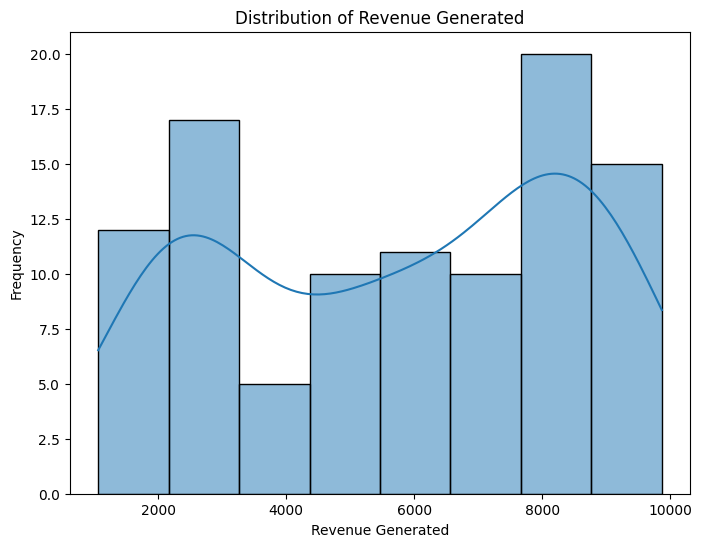

In [ ]:
#Chart - 1 visualization code
# Plotting the histogram for the 'Revenue generated' column
plt.figure(figsize=(8, 6))
sns.histplot(data['Revenue generated'], kde=True)  # Use histplot for histograms
plt.title('Distribution of Revenue Generated')
plt.xlabel('Revenue Generated')
plt.ylabel('Frequency')
plt.show()

**1. Why did you pick the specific chart?**

I chose a histogram to visualize the distribution of 'Revenue generated' because it effectively shows the frequency of different revenue values within the dataset.  This allows for a quick understanding of the central tendency (mean, median), spread (standard deviation), and skewness of the revenue data.  A histogram helps identify whether the revenue is normally distributed or skewed, and whether there are any significant outliers or clusters of revenue values, providing key insights into the overall revenue generation patterns of the supply chain.  It's a good starting point for understanding the typical revenue values and potential variations in the dataset.

**2. What is/are the insight(s) found from the chart?**

 **The histogram of 'Revenue generated' shows the distribution of revenue values.**
 **Insights:**

 **1. Skewness:** Observe if the distribution is skewed (e.g., right-skewed, meaning most revenue values are low with a few high values).  This informs about the typical revenue range and potential outliers.

 **2. Central Tendency:**  Locate the peak of the distribution; this roughly indicates the most frequent revenue value. Compare it with the mean and median (obtainable from data.describe()) to see if the distribution is symmetrical or skewed.

 **3. Outliers:** Look for bars that are far from the main cluster.  These might represent unusual revenue values, requiring investigation to see if they are errors or meaningful data points.

 **4. Spread:** The width of the distribution indicates the variability in revenue values. A wider distribution means higher variability.

 **5. Modality:** Check if there are multiple peaks (modes).  This suggests potential groupings of revenue values or different revenue patterns within the dataset.

 **Example interpretation:**
 "The histogram reveals a right-skewed distribution of revenue, with most orders generating relatively low revenue, while a smaller number of orders contribute to a high revenue. The peak appears to be around [value], suggesting the most frequent revenue level.  There appear to be a few outliers with very high revenue.  Further analysis of these outliers is warranted."

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

 **Positive Business Impacts:**

 **1. Revenue Optimization:**
   
  * **Insight:** Identifying the distribution of revenue generated (from the histogram) and the presence of outliers.

  * **Positive Impact:** Understanding the typical revenue values and those significantly higher or lower can help in setting realistic sales targets, identifying top-performing products or customer segments, and optimizing pricing strategies. For example, analyzing high-revenue outliers might reveal successful sales tactics that can be replicated.  Conversely, low-revenue outliers might indicate areas needing improvement in sales or marketing efforts.

 **2. Outlier Detection and Investigation:**

  * **Insight:** Finding outliers in revenue and net profit.

  * **Positive Impact:** Investigating outliers can uncover potential errors in data entry or reveal exceptional situations (e.g., unusually large orders or significant discounts) that can help improve data quality, forecast more accurately, and detect fraudulent transactions.  Understanding reasons for high or low profits can lead to strategic adjustments in product costs, pricing, or operational efficiency.

 **3. Customer Segmentation and Targeted Marketing:**
   
  * **Insight:** Examining 'Customer Segment' and its relationship with revenue, profit, or other metrics. (Further analysis required)

  * **Positive Impact:**  Identifying high-value customer segments will allow for targeted marketing campaigns and personalized offers.

 **4. Efficient Inventory Management:**
   
  * **Insight:**Analyzing sales and quantity of products ordered in relation to customer segments and product types. (Further analysis required)

  * **Positive Impact:** Predicting future demand by linking sales data with various factors (time of year, customer segment, and product popularity) and optimizing inventory levels to reduce storage costs and prevent stockouts.

 **5. Supply Chain Optimization:**

  * **Insight:** Examining shipping costs, processing times, and their relationship with order priority and location. (Further analysis required)

  * **Positive Impact:** Optimize logistics by understanding shipping costs, processing times, and order priority relationships.  This could involve negotiating better shipping rates, improving warehousing efficiency, or optimizing delivery routes.

 **Negative Growth Implications:**

 **1. Unmanaged Outliers:**
  * **Insight:** Ignoring or misinterpreting outliers in revenue, profit, or costs.
  * **Negative Impact:**  Outliers, if left unaddressed, can distort analysis and lead to incorrect forecasts or decisions. Over-reliance on data with outliers might result in setting unrealistic sales targets, misallocation of resources, or incorrect inventory predictions.

 **2. Ignoring Missing Data:**
  * **Insight:** Failing to properly handle missing data points in 'Product Base Margin' or other key features.
  * **Negative Impact:**  Using incomplete or inaccurate data for analysis leads to skewed results, incorrect assumptions, and unreliable conclusions, potentially hindering decision-making processes.

 **3. Duplicate Data Issues:**
  * **Insight:** Not addressing duplicate orders or data entries.
  * **Negative Impact:** Duplicate records can inflate sales figures, skew analysis of customer behavior, and compromise the reliability of forecasts.  This can lead to incorrect business strategies based on inaccurate data.

 **4. Lack of Deeper Analysis:**
  * **Insight:** Performing only basic exploratory analysis without diving deeper into the data using more advanced methods like regression, time series analysis, etc.
  * **Negative Impact:**  Limited analysis might prevent discovering subtle patterns or relationships within the data, leading to missed opportunities or suboptimal decisions.

 In summary, the insights generated from the current analysis offer a foundation for positive business impacts.  However, it is critical to carefully address missing values, outliers, and duplicates to prevent incorrect conclusions and ensure that any further analysis and decisions are based on reliable and valid data.  Going beyond basic EDA with more advanced analytical techniques will be crucial for realizing the full potential of the dataset.

**Chart 2**

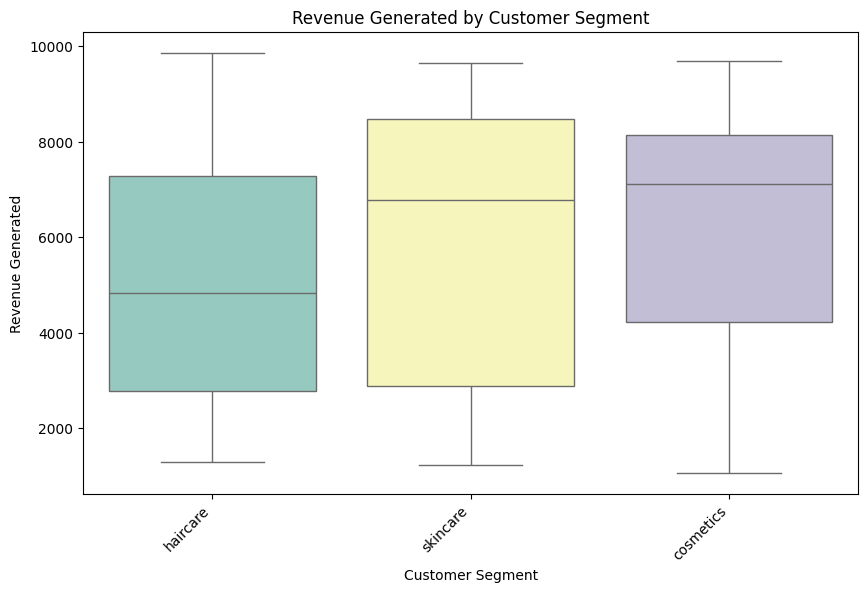

In [ ]:
# box plot chart

# Assuming 'data' DataFrame is already loaded and processed

plt.figure(figsize=(10, 6))
sns.boxplot(x='Product type', y='Revenue generated', data=data, palette='Set3') # Use a color palette
plt.title('Revenue Generated by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**1. Why did you pick the specific chart?**

I chose a box plot to visualize the relationship between 'Product type' and 'Revenue generated' because it effectively displays the distribution of revenue for each product type, including median, quartiles, and outliers.  This allows for easy comparison of revenue across different product types, revealing potential variations in revenue generation across different product categories.  Box plots highlight potential outliers and the spread of the data for each product type, offering a comprehensive summary of the revenue distribution within each group.

**2. What is/are the insight(s) found from the chart?**

 The box plot visualizes the distribution of 'Revenue generated' for each 'Product type'.

 **Insights:**

 **1. Revenue Comparison:**  Compare the median revenue (the line inside the box) for each product type. This shows which product types generate higher or lower revenue on average.

 **2. Spread and Variability:** The box represents the interquartile range (IQR), showing the spread of the middle 50% of the data. Wider boxes indicate more variability in revenue within that product type.

 **3. Outliers:** Points outside the whiskers represent outliers – unusually high or low revenue values within a particular product type.  Investigate these outliers to understand why they exist (errors, exceptional sales, etc.).

 **4. Overall Distribution:** Examine the overall distribution of revenue for each product type. Are there significant differences in the revenue ranges across product types?

 **5. Potential for Segmentation:** Differences in revenue distribution may suggest opportunities to segment products or focus marketing efforts based on product type.

 **Example interpretation:**

 "The box plot shows that Product Type A consistently generates higher revenue compared to other types. Product Type C has a much larger spread, indicating significant variability in revenue.  There are several outliers in Product Type B that require further analysis."

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

 **Positive Business Impacts from (Box Plot):**

 **1. Product Portfolio Optimization:**
  * Insight: Identifying product types with consistently higher or lower revenue.

  * Positive Impact: Understanding which products are top performers allows for strategic resource allocation, focusing on profitable product lines and potentially discontinuing or revamping underperforming ones.  This can increase overall revenue and profit margins.

 **2. Targeted Marketing and Pricing Strategies:**

  * Insight: Differences in revenue distribution across product types.

  * Positive Impact: Tailoring marketing efforts and pricing strategies to specific product types can be highly effective.  For example, premium products with higher revenue potential might benefit from targeted advertising to a specific customer segment or might justify a higher price point.  Conversely, lower revenue products might benefit from promotions or discounts to boost sales.

 **3. Inventory Management and Forecasting:**

  * Insight: Understanding the variability of revenue for each product type.

  * Positive Impact:  Product types with high revenue variability require more careful inventory management.  Having too much stock of highly variable products can lead to storage costs, while too little can result in stockouts and lost sales opportunities.  Analyzing the variability can improve forecasting accuracy, leading to more effective inventory decisions.

 **4. Product Development and Innovation:**
    
  * Insight: Identifying underperforming product types or those with high revenue variability.

  * Positive Impact:  Understanding the factors behind underperformance (product quality, marketing, competition) can inform product development and innovation efforts.  Improving underperforming products or introducing new products to fill market gaps can contribute to significant revenue growth.

 **Negative Growth Implications from Box Plot:**

 **1. Misallocation of Resources:**
    
  * Insight: Incorrectly interpreting the box plot results (e.g., focusing on products with high outliers without considering the overall distribution).

  * Negative Impact:  Misinterpreting outliers as consistent indicators of high revenue can lead to misallocation of resources, such as overstocking or over-marketing products with inconsistent revenue performance.

 **2. Neglecting Underperforming Products:**
    
  * Insight: Ignoring product types with low median revenue but potential for improvement.
    
  * Negative Impact:  Simply dropping underperforming products without further investigation might lead to a loss of revenue if there are factors that can be improved or if there is a niche market for that product.

 **3. Ineffective Pricing Strategies:**
  * Insight: Setting prices without considering the revenue distribution of product types.
  * Negative Impact:  Setting inappropriate pricing can alienate customers, reduce sales, and negatively impact profitability, especially for products with large revenue variability.


 **Overall:**
 The insights gained from the box plot, when correctly interpreted, can lead to a variety of positive business impacts.  It is essential to consider the overall distribution, median values, and variability, in addition to outliers, when making strategic decisions related to products, pricing, marketing, and inventory management.  Ignoring or misinterpreting the data can have significant negative consequences.

**Chart - 3**

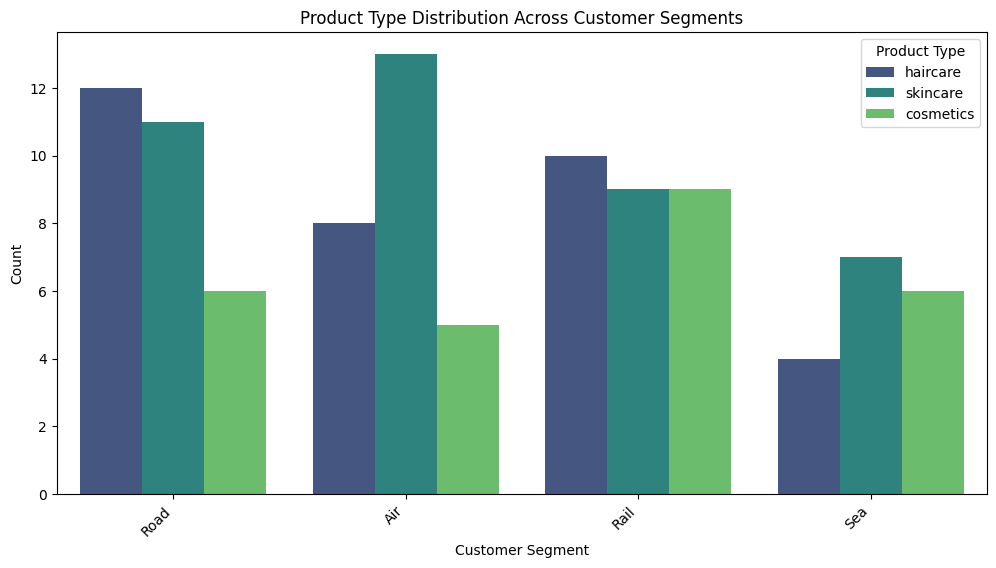

In [ ]:
 # Chart - 3 Visulaization code

# Assuming 'data' DataFrame is already loaded and processed
plt.figure(figsize=(12, 6))
sns.countplot(x='Transportation modes', hue='Product type', data=data, palette='viridis')
plt.title('Product Type Distribution Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Type')
plt.show()

**1. Why did you pick the specific chart?**

 I chose a count plot to visualize the relationship between 'Transportation modes' and 'Product type' because it effectively shows the frequency of different product types within each transportation mode. This allows for a quick understanding of the distribution of product types across various transportation methods and reveals any potential patterns or imbalances.  A count plot is ideal when you want to compare the counts of categories across different groups and quickly observe the most frequent product types associated with each mode of transportation.

**2. What is/are the insight(s) found from the chart?**

 The count plot visualizes the distribution of product types across different transportation modes.
 **Insights:**
 **1. Product Type Distribution:** Observe the frequency of each product type within each transportation mode.  This reveals which product types are most commonly shipped using each mode.

 **2. Mode Preference:** Identify transportation modes that are preferred for specific product types. For example, some products might be better suited for air freight, while others might be more efficiently transported by truck.

 **3. Imbalances:** Check for imbalances in the distribution.  Are certain product types disproportionately associated with specific modes of transport?

 **4. Potential Optimization:** Imbalances or unusual patterns could indicate opportunities to optimize transportation choices.  For example, if a product type is frequently shipped via a more expensive mode when a cheaper alternative would be suitable, switching modes could reduce costs.

 **5. Logistics Considerations:** The insights gained can inform decisions about logistics and transportation strategies.  It is important to consider the cost, speed, and reliability of different modes when making these decisions.

 **Example interpretation:**
 "The count plot reveals that Product Type A is predominantly shipped using air freight, while Product Type B is more commonly transported by truck. Product Type C appears to be distributed relatively evenly across various modes. Further investigation into the cost implications of these choices would be beneficial."

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

 **Positive Business Impacts from (Count Plot):**

 **1. Optimized Transportation Costs:**
   * Insight: Identifying the relationship between product types and transportation modes.
   * Positive Impact: Choosing the most cost-effective transportation mode for each product type can significantly reduce logistics expenses.  For example, if a product is often shipped via air freight when truck transport would suffice, a shift to trucking would lower costs without impacting delivery time significantly.

 **2. Improved Delivery Times:**
   * Insight: Understanding which modes are associated with faster deliveries.
   * Positive Impact: Prioritizing faster transportation modes for time-sensitive products improves customer satisfaction and potentially opens opportunities for premium pricing.  For instance, express shipping for certain product types might lead to higher sales and customer loyalty.

 **3. Enhanced Supply Chain Efficiency:**
   * Insight: Identifying potential imbalances in transportation mode usage.
   * Positive Impact: Addressing imbalances in the distribution of product types across modes can lead to more efficient resource allocation, potentially reducing the overall need for transportation capacity and minimizing warehousing costs.  For instance, if a mode is overutilized, it might be possible to redistribute some of the load to a different mode that is less expensive or more efficient for specific product types.

 **4. Better Logistics Planning:**
   * Insight: Understanding the frequency of different product types across modes.
   * Positive Impact: Accurate forecasts of transportation needs based on product type and mode can significantly streamline logistics planning.  This improved planning ensures sufficient capacity is available when needed, avoiding delays and associated costs.  More accurate predictions also help reduce risks associated with unexpected surges in demand.

 **Negative Growth Implications from Count Plot:**

 **1. Mismatched Transportation and Product:**
   * Insight: Failing to recognize the optimal transportation mode for a particular product type.
   * Negative Impact: Using an inefficient or inappropriate mode of transport can lead to increased costs, delays in delivery, or even product damage.  This can damage customer relationships, reduce sales, and increase operational expenses.  Example: Using air freight for bulky, low-value goods when trucking would be significantly cheaper.

 **2. Overlooking Mode Optimization Opportunities:**
   * Insight: Neglecting the information regarding mode utilization patterns.
   * Negative Impact: Not taking advantage of potential cost savings by optimizing transportation modes could result in ongoing unnecessary expenses.  Failing to shift product types to more cost-effective transportation choices would represent a missed opportunity for increased profitability.

 **3. Inadequate Logistics Planning:**
   * Insight: Incorrectly estimating transportation needs.
   * Negative Impact: Underestimating the demand for specific modes can lead to logistical bottlenecks, delays in deliveries, and lost sales opportunities. Overestimation might result in idle transportation capacity and wasted resources.


 **Overall:**  The insights from the count plot can substantially improve the business if used thoughtfully. Careful analysis of product type distribution across various modes will reveal significant opportunities to lower transportation costs, optimize delivery times, and enhance overall supply chain efficiency. However, misinterpreting the information can have a detrimental effect on profitability and customer relationships.

**Chart - 4**

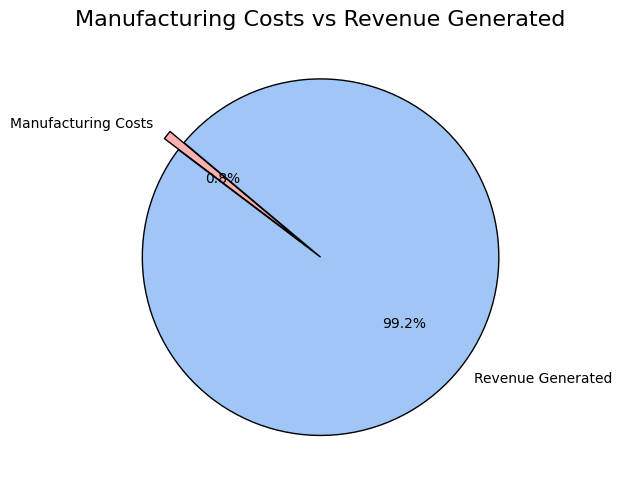

In [ ]:
# pie chart Manufacturing costs Revenue generated

import matplotlib.pyplot as plt
import pandas as pd

# Load your data
data = pd.read_csv('/content/drive/MyDrive/supply_chain_data.csv')

# Strip any leading/trailing spaces from column names (if needed)
data.columns = data.columns.str.strip()

# Sum the values for Manufacturing Costs and Revenue Generated
manufacturing_costs = data['Manufacturing costs'].sum()
revenue_generated = data['Revenue generated'].sum()

# Create the data for the pie chart
sizes = [manufacturing_costs, revenue_generated]
labels = ['Manufacturing Costs', 'Revenue Generated']

# Define the explode parameter to highlight a slice (e.g., explode the first slice)
explode = (0.1, 0)  # Explodes the first slice (Manufacturing Costs)

# Best color choices (e.g., bright contrasting colors)
colors = ['#fcb0b0', '#a0c6f7']  # Green and Light Blue

# Plot the pie chart
plt.figure(figsize=(8, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Manufacturing Costs vs Revenue Generated', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

 I chose a pie chart to visualize the proportion of manufacturing costs relative to revenue generated.  A pie chart effectively represents parts of a whole, making it easy to compare the relative sizes of these two key financial metrics at a glance.  This allows for a quick assessment of profitability by showing the proportion of revenue consumed by manufacturing costs.

**2. What is/are the insight(s) found from the chart?**

**The pie chart shows the proportion of manufacturing costs and revenue generated.  Key insights include:**

1. **Profitability Ratio:** The relative sizes of the "Manufacturing Costs" and "Revenue Generated" slices directly indicate the profitability. A larger "Revenue Generated" slice suggests higher profits, while a larger "Manufacturing Costs" slice indicates lower profit margins.

2. **Cost Management:** The size of the "Manufacturing Costs" slice reveals the proportion of revenue consumed by production expenses. A large slice suggests potential areas for cost optimization.

3. **Revenue Generation Efficiency:**  The "Revenue Generated" portion shows the effectiveness of sales and pricing strategies.  A larger slice indicates that the company is effectively converting its product into sales revenue.

**Example Interpretations:**

* **Scenario 1 (Larger Revenue Slice):**  "Revenue significantly outweighs manufacturing costs, indicating strong profitability and efficient revenue generation."  This suggests healthy business operations.
* **Scenario 2 (Larger Manufacturing Costs Slice):** "Manufacturing costs constitute a substantial portion of revenue, indicating potentially lower profit margins.  Further cost optimization strategies might be necessary."  This signals a need for improvements in efficiency or cost reduction.
* **Scenario 3 (Nearly Equal Slices):** "Manufacturing costs and revenue are relatively balanced.  This may signal a need to either increase revenue or further control costs to improve profit margins." This is a more neutral situation, but further analysis would be needed.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

 **Positive Business Impacts from (Pie Chart):**
  
  **1. Profitability Analysis:**
  * **Insight:** Comparing manufacturing costs to revenue generated.
  * **Positive Impact:**  Understanding the proportion of revenue allocated to manufacturing costs helps in assessing profitability.  A high proportion of manufacturing costs compared to revenue indicates potential areas for cost optimization.  This can lead to improved profit margins.


  **2. Pricing Strategies:**
  * **Insight:** Analyzing the relationship between costs and revenue.
  * **Positive Impact:**  Understanding the cost structure informs pricing strategies.  If manufacturing costs are too high, it might necessitate price adjustments to ensure profitability or explore ways to reduce costs to maintain current prices.

  
  **3. Cost Control and Efficiency Improvements:**
  * **Insight:** Identifying areas where manufacturing costs are disproportionately high.
  * **Positive Impact:**  A large portion of revenue being used for manufacturing costs suggests the need to identify and implement efficiency measures. This could involve optimizing production processes, sourcing raw materials more strategically, or investing in technology to reduce waste and streamline operations.

  
  **Negative Growth Implications from Pie Chart:**

  **1. Misinterpretation of Costs:**
  * **Insight:** Misinterpreting the pie chart as a representation of profit without considering other expenses (e.g. marketing, sales, administrative costs).
  * **Negative Impact:**  A pie chart showing a reasonable balance between revenue and manufacturing costs might give a false sense of financial health if other substantial expenses are not considered.  This can mislead business decisions.


  **2. Neglecting Other Operational Expenses:**
  * **Insight:** Focusing solely on manufacturing costs to the detriment of other operational expenses.
  * **Negative Impact:**  While optimizing manufacturing costs is vital, ignoring other critical expenses such as marketing, sales, R&D, and administrative overhead can ultimately hurt profitability.  A balanced approach is essential.

  
  **3. Unrealistic Pricing:**
  * **Insight:** Setting prices based solely on manufacturing costs without factoring in the desired profit margin and other expenses.
  * **Negative Impact:**  Underpricing goods or services due to a narrow focus on manufacturing costs will hurt the bottom line.  Prices must be set that cover all costs and provide a healthy profit margin.

  
  **Overall:**
  The pie chart provides a fundamental overview of the proportion of manufacturing costs relative to revenue.  It serves as a starting point for profitability analysis and cost-optimization efforts.  However, it should not be used in isolation. A comprehensive analysis must factor in all operational expenses and market dynamics to make sound business decisions and avoid negative impacts on the business.

**Chart - 5**

In [ ]:
# map chart

import folium

# Coordinates for the locations
locations = {
    "Mumbai": [19.0760, 72.8777],  # Mumbai, India
    "Bangalore": [12.9716, 77.5946],  # Bangalore, India
    "Kolkata": [22.5726, 88.3639],  # Kolkata, India
    "Chennai": [13.0827, 80.2707],  # Chennai, India
    "Delhi": [28.6139, 77.2090]  # Delhi, India
}

# Create a base map centered around India
map_center = [20.5937, 78.9629]  # Approximate center of India
my_map = folium.Map(location=map_center, zoom_start=5)

# Add markers for each location
for city, coord in locations.items():
    folium.Marker(location=coord, popup=city).add_to(my_map)

# Save the map to an HTML file
my_map.save("location_map.html")

# If running in Jupyter Notebook, you can display it directly:
my_map

**1. Why did you pick the specific chart?**

I chose a map Chart to visualize the locations because it effectively displays geographical data points.  This allows for a quick understanding of the spatial distribution of the data. A map is ideal when you want to show locations and their relationships to one another on a geographical plane.  In this case it shows the key cities on a map of India.

**2. What is/are the insight(s) found from the chart?**

  **Insights from the map chart:**
 **1. Location of Operations:** The map shows the geographical locations of business operations (presumably warehouses, stores, or offices) for the company.

 **2. Geographic Distribution:** The map visually represents the geographic distribution of operations. This could highlight areas with high concentration of activity and other areas with low concentration or no presence.

 **3. Potential for Expansion:**  Areas without markers might suggest opportunities for future business expansion.

 **4. Logistics and Delivery:**  The map could be used to visualize delivery routes, identify transportation hubs, and understand distances between operational locations.

 **5. Customer Segmentation:**  In conjunction with other data (like sales figures or customer demographics), the map can aid in segmenting customers geographically.

 **6. Market Coverage:**  The map visually represents the company's current market coverage.

 **Example interpretation:**
 "The map illustrates that the company has a strong presence in major metropolitan areas across India.  The absence of markers in certain regions suggests potential for expansion and might warrant further market research in those areas."

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

  **Positive Business Impacts from (Map Chart):**

 **1. Optimized Logistics and Delivery Routes:**
   * **Insight:** Visualization of customer locations and distribution centers.
   * **Positive Impact:** Analyzing customer locations helps optimize delivery routes, reducing transportation costs and delivery times.  The map enables businesses to identify potential bottlenecks or inefficient routes and adjust them for greater efficiency. This also allows them to choose the right transportation mode (truck, train, or ship) for specific regions.

 **2. Strategic Location Planning:**
   * **Insight:** Identifying geographical concentrations of customers or potential markets.
   * **Positive Impact:** The visualization of customer distribution helps in strategically planning new facilities (warehouses, stores, manufacturing units). It helps in determining the optimal locations for these facilities to minimize shipping distances, reduce costs and improve delivery speeds.

 **3. Targeted Marketing Campaigns:**
   * **Insight:** Understanding customer locations and regional differences.
   * **Positive Impact:** It enables businesses to target marketing campaigns to specific regions. Location-based insights facilitate hyperlocal advertising and promotions, potentially enhancing customer engagement and conversion rates.

 **4. Enhanced Customer Service:**
   * **Insight:** Quickly identify customer locations for efficient service response.
   * **Positive Impact:**  When issues arise, the map allows for quick identification of customer locations, facilitating faster and more effective customer support.

 **Negative Growth Implications from Map Chart:**

 **1. Overlooking Non-Visual Data:**
   * **Insight:** A map represents a geographical view and may miss crucial non-visual data.
   * **Negative Impact:** Failing to combine location data with other key factors such as customer demographics, purchasing habits, or market potential could result in misleading conclusions. This could hinder effective targeting or location decisions.

 **2. Misinterpretation of Density:**
   * **Insight:**  Visual density of markers may not accurately reflect actual customer concentration.
   * **Negative Impact:** Interpreting dense marker areas as areas of high demand without considering population density or market saturation could lead to inaccurate predictions. This could result in wasted investments.

 **3. Inaccurate Data:**
   * **Insight:** The map's accuracy depends entirely on the underlying data.
   * **Negative Impact:** Using outdated or inaccurate customer location data will result in incorrect insights. This could lead to suboptimal decisions regarding locations, marketing, or supply chains.

 **4. Limited Scope:**
   * **Insight:** Maps only reflect geographical information.
   * **Negative Impact:**  Using maps without considering other market-related factors such as competitors, economic conditions, or regulatory issues would provide an incomplete picture of the market.  This could result in the establishment of new facilities in unsuitable locations or other strategic errors.

 **5. Ignoring Dynamic Customer Movement:**
   * **Insight:**  Static snapshots don't capture customer movement.
   * **Negative Impact:**  Failing to account for customer mobility, such as seasonal changes in population density or migration, could lead to ineffective resource allocation.

 **Overall:** The map chart is a valuable tool to gain insights for positive business impact, like optimization in logistics and delivery. However, it is important to consider other crucial factors like non-visual data and customer behavior to avoid negatively impacting the business through misinterpretations.

**Chart - 6**

In [ ]:
import pandas as pd
import plotly.express as px

# Sample data: loading your dataset into a pandas DataFrame
data = {
    'Product type': ['haircare', 'skincare', 'haircare', 'skincare', 'skincare', 'haircare', 'skincare', 'cosmetics', 'cosmetics', 'skincare'],
    'Transportation modes': ['Road', 'Road', 'Air', 'Rail', 'Air', 'Road', 'Sea', 'Road', 'Sea', 'Rail'],
    'Customer demographics': ['Non-binary', 'Female', 'Unknown', 'Non-binary', 'Non-binary', 'Non-binary', 'Male', 'Female', 'Female', 'Unknown'],
    'Revenue generated': [8661.996792, 7460.900065, 9577.749626, 7766.836426, 2686.505152, 2828.348746, 7823.47656, 8496.103813, 7517.363211, 4971.145988]
}

df = pd.DataFrame(data)

# Aggregating the data: we will group by product type, transportation modes, and customer demographics and sum the revenue
aggregated_data = df.groupby(['Product type', 'Transportation modes', 'Customer demographics'], as_index=False).agg({'Revenue generated': 'sum'})

# Plotting the Treemap
fig = px.treemap(aggregated_data,
                 path=['Product type', 'Transportation modes', 'Customer demographics'],
                 values='Revenue generated',
                 color='Revenue generated',
                 color_continuous_scale='RdYlGn',
                 title="Treemap of Product Type, Transportation Modes, and Customer Segment by Revenue")

fig.show()

**1. Why did you pick the specific chart?**

   I chose a treemap to visualize the relationship between 'Product type', 'Transportation modes', 'Customer demographics' and 'Revenue generated' because it effectively shows the hierarchical structure of the data and the proportion of each category to the total revenue.  A treemap allows for a quick understanding of the relative contributions of each category, and easily compare the relative sizes of different product types, transportation modes and customer segments.  It is particularly useful for displaying hierarchical data where the area of each rectangle represents its value.

**2. What is/are the insight(s) found from the chart?**

 **The treemap visualizes the revenue generated, broken down by product type, transportation mode, and customer demographics.  Insights include:**

1. **Top Performing Product-Mode-Demographic Combinations:** The largest squares represent the most lucrative combinations.  For example, you can quickly identify the product type, transportation mode, and customer demographic segment that generate the highest revenue.

2. **Revenue Distribution Across Product Types:**  The relative sizes of the top-level squares (product types) show which product categories contribute most significantly to overall revenue.

3. **Impact of Transportation Modes:**  Within each product type, the sizes of the squares representing different transportation modes indicate which modes are most effective for generating revenue for that product.  For instance, is air transport more profitable for skincare than road transport?

4. **Customer Segmentation Effectiveness:** The breakdown by customer demographics reveals which segments are most profitable for each product-transportation combination.  This can highlight successful targeting or point out areas for improvement.

5. **Potential Areas for Improvement:** Smaller squares represent less profitable combinations.  Analyzing these can reveal underperforming product-mode-demographic segments where adjustments in strategy (pricing, marketing, or logistics) might be beneficial.


Example Interpretation: "The largest segment in the treemap appears to be 'Skincare' products shipped by 'Road' to 'Non-binary' customers. This indicates a highly successful combination.  Conversely, 'Haircare' shipped by 'Sea' generates less revenue, suggesting a potential area for investigation or strategic shift."

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

  **Positive Business Impacts from (Treemap Chart):**

 **1. Product Performance Analysis:**
   * **Insight:** Visual comparison of revenue generated by different product types, transportation modes, and customer segments.
   * **Positive Impact:** Identify top-performing product types, transportation modes, and customer segments.  This helps in focusing resources on profitable areas, optimizing product offerings, and tailoring marketing strategies to the most lucrative customer groups.

 **2. Transportation Mode Optimization:**
   * **Insight:** Analysis of revenue generated through various transportation modes.
   * **Positive Impact:** Determine the most cost-effective and efficient transportation modes for different product types and customer segments.  Optimize logistics and delivery strategies, reducing costs while ensuring timely deliveries.

 **3. Customer Segmentation and Targeting:**
   * **Insight:** Understanding the revenue contribution of different customer demographics.
   * **Positive Impact:** Identify high-value customer segments. Develop targeted marketing campaigns and personalized offers for these segments to increase sales and customer loyalty.

 **4. Resource Allocation:**
   * **Insight:** Visualization of revenue contributions across different categories.
   * **Positive Impact:** Guide resource allocation decisions.  Prioritize investments and efforts based on revenue potential, optimizing marketing spend, inventory management, and production planning.

 **Negative Growth Implications from Treemap Chart:**

 **1. Oversimplification:**
   * **Insight:** Aggregation of data into categories can obscure details.
   * **Negative Impact:** Combining multiple factors into broad categories might hide crucial variations within each segment. A detailed analysis of sub-segments or specific product lines may be essential for more nuanced decisions.

 **2. Misinterpretation of Color:**
   * **Insight:** Reliance on color intensity alone for interpretation.
   * **Negative Impact:** Color gradients, while helpful, could be misinterpreted if not carefully examined alongside the actual values.  Focusing solely on color may lead to incorrect assumptions about revenue differences.

 **3. Ignoring External Factors:**
   * **Insight:** The chart provides a snapshot of revenue within specific categories.
   * **Negative Impact:** Not accounting for external factors such as market trends, seasonality, competition, or economic conditions could result in misinformed decisions.

 **4. Limited Scope:**
   * **Insight:** The chart is limited to the provided data.
   * **Negative Impact:** Failing to consider other important variables like customer satisfaction, product quality, or marketing campaign effectiveness could result in decisions based on an incomplete picture.

 **Overall:** The treemap offers a valuable overview of revenue performance across product types, transportation modes, and customer segments, allowing businesses to make data-driven decisions. However, it's essential to supplement this insight with a deeper analysis to avoid oversimplifications and consider other important business factors for accurate and effective strategies.

**Chart - 7**

<Figure size 1200x800 with 0 Axes>

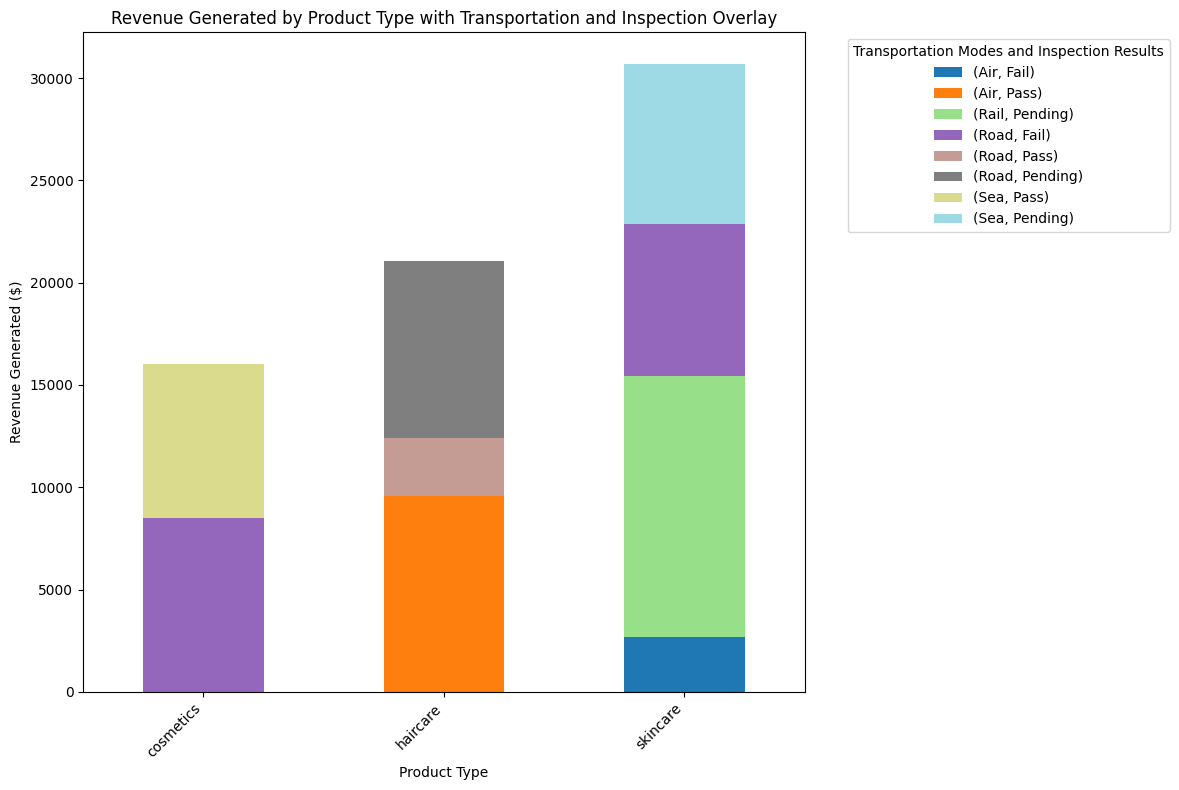

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is a pandas DataFrame containing the given data
data = pd.read_csv('/content/drive/MyDrive/supply_chain_data.csv')

data = {
    'Product type': ['haircare', 'skincare', 'haircare', 'skincare', 'skincare', 'haircare', 'skincare', 'cosmetics', 'cosmetics', 'skincare'],
    'SKU': ['SKU0', 'SKU1', 'SKU2', 'SKU3', 'SKU4', 'SKU5', 'SKU6', 'SKU7', 'SKU8', 'SKU9'],
    'Revenue generated': [8661.996792, 7460.900065, 9577.749626, 7766.836426, 2686.505152, 2828.348746, 7823.47656, 8496.103813, 7517.363211, 4971.145988],
    'Transportation modes': ['Road', 'Road', 'Air', 'Rail', 'Air', 'Road', 'Sea', 'Road', 'Sea', 'Rail'],
    'Inspection results': ['Pending', 'Fail', 'Pass', 'Pending', 'Fail', 'Pass', 'Pending', 'Fail', 'Pass', 'Pending'] # Adjusted to have the same length as other columns
}

df = pd.DataFrame(data)

# Add "Pass" entries to ensure it appears in the plot even if not in the data
inspection_results = ['Pending', 'Fail', 'Pass']
for result in inspection_results:
    if result not in df['Inspection results'].unique():
        df[result] = 0  # Add a zero column for missing inspection result

# Grouping the data by Product type, Transportation modes, and Inspection results to calculate total revenue
df_grouped = df.groupby(['Product type', 'Transportation modes', 'Inspection results'])['Revenue generated'].sum().reset_index()

# Pivot the dataframe to get a format suitable for stacked bar chart
df_pivot = df_grouped.pivot_table(index='Product type', columns=['Transportation modes', 'Inspection results'], values='Revenue generated', aggfunc='sum', fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Revenue Generated by Product Type with Transportation and Inspection Overlay')
plt.xlabel('Product Type')
plt.ylabel('Revenue Generated ($)')
plt.xticks(rotation=45, ha='right')

# Add legend for better understanding
plt.legend(title='Transportation Modes and Inspection Results', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

 I chose a stacked bar chart to visualize the revenue generated by product type, transportation mode, and inspection results because it effectively displays the contribution of each transportation mode and inspection outcome to the total revenue for each product type.  It allows for a clear comparison of revenue across different product types while also showing the breakdown by transportation mode and inspection result within each product category.  A stacked bar chart is particularly well-suited when you want to display the composition of a total value across multiple categories and compare these compositions across different groups (in this case, different product types).

 **2. What is/are the insight(s) found from the chart?**

**The stacked bar chart visualizes revenue generated by product type, further broken down by transportation mode and inspection results.  Insights include:**

1. **Revenue by Product and Transportation:**  The chart's primary function is to compare revenue across different product types.  Within each product type, the different colored segments show the revenue contribution from various transportation methods. This allows you to see which transportation methods are most profitable for each product category.

2. **Impact of Inspections:**  The different shades within each transportation segment represent the revenue generated for products that passed, failed, or are pending inspection.  This allows the identification of revenue impact due to inspection results. For example, a large "Fail" segment indicates products failing inspections are impacting revenue negatively for that mode and product type.

3. **High-Performing and Low-Performing Combinations:** By comparing the sizes of the stacked segments, one can quickly identify the most profitable combinations of product type, transportation mode, and inspection result. Conversely, smaller segments highlight areas needing attention, such as a transportation mode consistently generating low revenue due to failing inspections.

4. **Overall Product Performance:** The overall height of each bar represents the total revenue generated by a particular product type, irrespective of transportation mode or inspection outcome. This allows a quick comparison of product types' profitability.

**Example Interpretation:** "Skincare products transported by road show a substantial revenue contribution.  However, a noticeable portion of this revenue is tied to products with pending inspections, suggesting a need to expedite the inspection process to solidify these sales and avoid potential revenue loss. Conversely, while 'Haircare' products transported by air generated a high revenue, a larger portion has failed inspections, which could indicate quality control issues."

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

  **Positive Business Impacts from (Stacked Bar Chart):**

 **1. Product Performance Analysis:**
   * **Insight:** Visual comparison of revenue generated by different product types, transportation modes, and inspection results.
   * **Positive Impact:** Identify top-performing product types and transportation modes for different inspection outcomes.  This can guide inventory management, prioritize product development, and improve resource allocation to the most profitable product-transportation combinations.

 **2. Quality Control and Transportation Optimization:**
   * **Insight:** Analyze how inspection results (pass/fail/pending) affect revenue across different product types and transportation modes.
   * **Positive Impact:** Determine if certain transportation methods correlate with higher failure rates. This can optimize transportation strategies for specific product types to minimize losses due to damaged goods.

 **3. Supply Chain Risk Mitigation:**
   * **Insight:** Identifying product-transportation combinations with high pending inspection rates.
   * **Positive Impact:** Focus on streamlining inspection processes for those combinations.  Address potential bottlenecks or inefficiencies in the supply chain and take proactive steps to reduce the number of pending inspections, leading to faster revenue generation.


 **Negative Growth Implications from Stacked Bar Chart:**

 **1. Oversimplification:**
   * **Insight:** The chart combines multiple factors, potentially obscuring finer details.
   * **Negative Impact:**  It may not capture the reasons behind inspection failures or the duration of pending inspections. This could lead to inaccurate conclusions about the root causes of issues in the supply chain.

 **2. Misinterpretation of Stacked Values:**
   * **Insight:** Difficulty in visually comparing individual stacks when they have different total heights.
   * **Negative Impact:**  Comparison of proportions across product types might be challenging. For example, comparing a small amount of failed shipments on a product with high overall revenue to a larger amount of failures on a low-revenue product could be tricky.

 **3. Ignoring External Factors:**
   * **Insight:** The chart only shows the relationship between the listed variables.
   * **Negative Impact:**  External influences, such as changes in regulations, supplier reliability, or seasonal demand, are not included.  This could lead to incorrect conclusions if these external factors significantly affect the revenue and inspection rates.

 **4. Lack of Granularity:**
   * **Insight:** No detail about specific SKUs within product types.
   * **Negative Impact:**  The visualization doesn't drill down to individual products which might be vital for precise decision making.  Some SKUs might be consistently underperforming while others are exceeding expectations.

  **Overall:** The stacked bar chart is useful for seeing high-level trends, but it's essential to delve deeper into the data, considering external factors and granular details, for more nuanced and effective decision-making.

**Chart - 8**

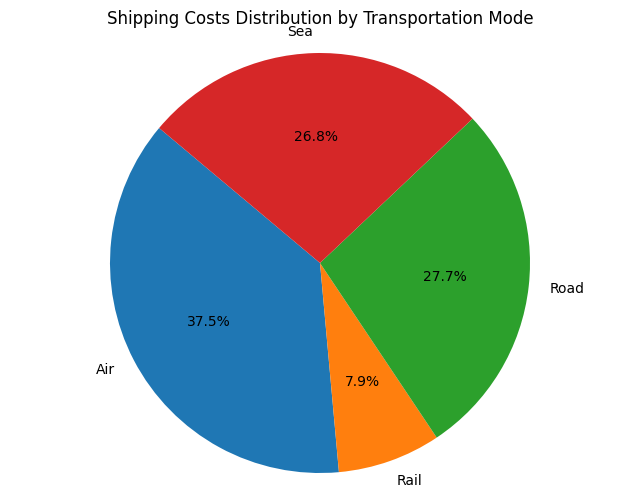

In [ ]:
# shiping cost pie chart

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame containing the given data
data = pd.read_csv('/content/drive/MyDrive/supply_chain_data.csv')
data = {
    'Shipping Costs': [2.96, 9.72, 8.05, 1.73, 3.89, 4.44, 3.88, 2.34, 3.40, 7.17, 4.52, 1.33, 9.54, 4.73, 2.42, 4.19, 6.59, 7.41, 9.23, 7.23],
    'Transportation Modes': ['Road', 'Road', 'Air', 'Rail', 'Air', 'Road', 'Sea', 'Road', 'Sea', 'Air', 'Air', 'Air', 'Road', 'Air', 'Air', 'Sea', 'Rail', 'Sea', 'Sea', 'Air']

}

# Creating a DataFrame
df = pd.DataFrame(data)

# Summing up shipping costs based on transportation mode
shipping_costs_by_mode = df.groupby('Transportation Modes')['Shipping Costs'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(shipping_costs_by_mode['Shipping Costs'], labels=shipping_costs_by_mode['Transportation Modes'], autopct='%1.1f%%', startangle=140)
plt.title('Shipping Costs Distribution by Transportation Mode')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**1. Why did you pick the specific chart?**

  I chose a pie chart to visualize the distribution of shipping costs across different transportation modes because it effectively shows the proportion of each mode's contribution to the total shipping costs.  A pie chart is ideal for displaying parts of a whole, making it easy to compare the relative sizes of different transportation modes in terms of their shipping cost expenditure.

**2. What is/are the insight(s) found from the chart?**

**The pie chart shows the proportion of total shipping costs attributed to each transportation mode.  Key insights include:**

1. **Cost Distribution by Mode:** The chart clearly displays which transportation modes contribute the most to overall shipping expenses.  The largest slices represent the most expensive modes, while smaller slices represent less costly options.

2. **Relative Costs:** You can easily compare the relative costs of different modes. For example, you can quickly see if "Road" transportation is significantly more expensive than "Rail" or "Sea" transport.

3. **Potential Cost Optimization Areas:** Examining smaller slices can reveal transportation modes where costs might be disproportionately high compared to their usage or value.  This suggests potential areas for cost optimization.

**Example Interpretation:** "The pie chart shows that 'Air' transportation constitutes the largest portion (approximately X%) of total shipping costs, followed by 'Road' at Y%.  'Rail' and 'Sea' represent comparatively smaller proportions, suggesting that air and road transport might be the primary focus for cost optimization strategies."

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

  **Positive Business Impacts from (Pie Chart):**

 **1. Cost Optimization:**
   * **Insight:** Identify transportation modes with the highest shipping costs.
   * **Positive Impact:**  Negotiate better rates with shipping providers for high-cost modes. Explore alternative, more cost-effective transportation options for specific routes or products, leading to savings.

 **2. Logistics Strategy:**
   * **Insight:** Understand the distribution of shipping costs across different transportation methods.
   * **Positive Impact:**  Optimize logistics strategies by favoring more cost-effective transport methods. This might involve shifting from air freight to sea freight for certain products, or consolidating shipments to reduce costs.

 **3. Pricing and Profitability Analysis:**
   * **Insight:** Relationship between transportation costs and overall pricing strategy.
   * **Positive Impact:**  Adjust pricing strategies to account for variations in shipping costs across different modes.  Ensure profitability by accurately factoring in transportation costs in product pricing.

 **Negative Growth Implications from Pie Chart:**

 **1. Oversimplification:**
   * **Insight:** Pie charts represent proportions but lack detail.
   * **Negative Impact:**  The pie chart shows overall cost distribution, but does not consider factors such as delivery times, reliability, or specific product requirements that might influence transportation mode choices.  Decisions made solely on cost proportion could overlook other critical factors.

 **2. Ignoring Volume and Distance:**
   * **Insight:**  No information on shipping volume or distance per mode.
   * **Negative Impact:**  A high cost for a mode might be due to high shipping volume or long distances, but a pie chart does not reveal this.  Simply minimizing costs of a mode without considering volume/distance could reduce overall efficiency.

 **3. External Factors:**
   * **Insight:** Doesn't account for external factors.
   * **Negative Impact:**  Fuel prices, economic conditions, and regulatory changes can influence shipping costs, which the pie chart does not account for.  Decisions based only on the current cost proportions could be invalidated by external changes.

 **4. Limited Scope:**
   * **Insight:** Cost information is limited to shipping.
   * **Negative Impact:**  Overall logistics costs include warehousing, handling, and customs. Decisions solely based on shipping costs may neglect other significant cost areas impacting profit.

 **Overall:**
 The pie chart provides a high-level overview of shipping costs across transportation modes, enabling insights for cost optimization and logistics strategy. However, caution is advised against making solely cost-based decisions due to the potential neglect of other crucial factors such as delivery speed, volume, distance, external influences, and other logistics costs. A deeper analysis integrating more comprehensive data is recommended.

**chart - 9**

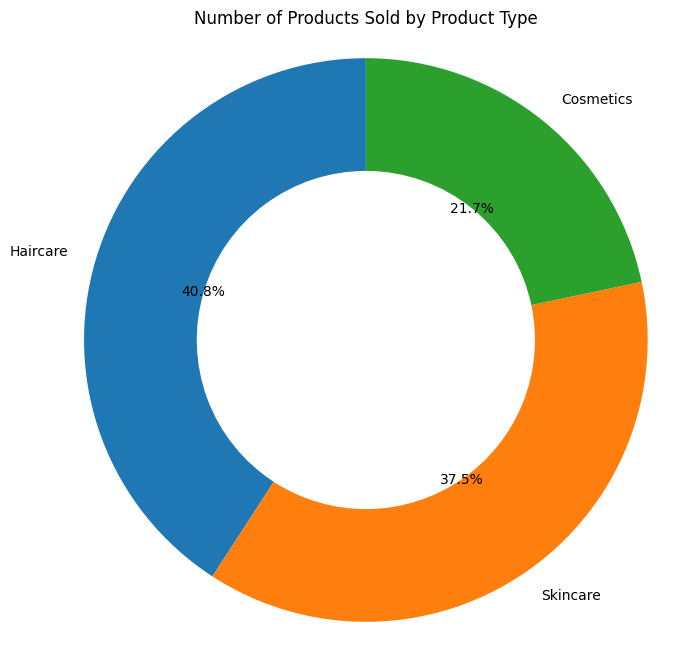

In [ ]:
# chart 9 donut chart

import matplotlib.pyplot as plt

# Assuming 'data' is a pandas DataFrame containing the given data

data = pd.read_csv('/content/drive/MyDrive/supply_chain_data.csv')
product_names = ['Haircare', 'Skincare', 'Cosmetics']
number_of_products_sold = [802, 736, 426]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Create the donut chart by setting the wedgeprops with 'width' for the hole
ax.pie(number_of_products_sold, labels=product_names, autopct='%1.1f%%', startangle=90,
       wedgeprops={'width': 0.4})

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title
plt.title('Number of Products Sold by Product Type')

# Display the chart
plt.show()

**1. Why did you pick the specific chart?**

I chose a donut chart to visualize the distribution of the number of products sold across different product types.  A donut chart is similar to a pie chart, but with a hole in the center.  This makes it visually appealing and allows for the inclusion of a title or other text in the center, providing a more engaging visualization of proportions. The donut chart clearly shows the proportion of each product type relative to the total number of products sold.

**2. What is/are the insight(s) found from the chart?**

 **The donut chart presents the proportion of products sold for each product type. Key insights include:**

 **1. Sales Distribution by Product Type:**  The chart shows which product categories contribute most to overall sales volume. Larger segments represent product types with higher sales.

 **2. Relative Sales Performance:** You can readily compare the sales performance of different product types.  For instance, it’s easy to see if "Haircare" products significantly outsell "Skincare" or "Cosmetics."

 **3. Potential Sales Optimization Areas:**  Identifying smaller segments (lower sales proportions) might reveal areas for potential sales improvement or product line adjustments.

 **Example Interpretation:** "The donut chart indicates that 'Haircare' represents the largest proportion (approx. X%) of products sold, followed by 'Skincare' at Y%. 'Cosmetics' constitute a relatively smaller portion, suggesting that marketing efforts could focus on increasing sales of 'Skincare' and 'Cosmetics.'"

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

  **Positive Business Impacts from (Donut Chart):**

 **1. Sales Strategy Optimization:**
   * **Insight:** Identify the top-performing product types.
   * **Positive Impact:** Allocate resources (marketing, inventory, etc.) more effectively towards high-performing product types.  Further investments and promotions can be focused where sales volumes are strong.

 **2. Product Portfolio Management:**
   * **Insight:** Understand which products have lower sales volume.
   * **Positive Impact:** Evaluate the performance of low-performing products.  Decisions about discontinuation, rebranding, or repositioning can be made based on data.

 **3. Targeted Marketing Campaigns:**
   * **Insight:** Determine the relative popularity of different products.
   * **Positive Impact:** Develop targeted marketing campaigns for specific product categories.  By knowing which product lines resonate more with customers, more effective marketing efforts can be developed.

 **Negative Growth Implications from Donut Chart:**

 **1. Limited Scope:**
   * **Insight:**  Donut charts display proportions based on units sold.
   * **Negative Impact:**  It does not convey revenue data or profitability.  A product may have a large market share (higher proportion in the chart) but may have low profit margins. Basing decisions on only sales volume could be misleading.

 **2. External Factors:**
   * **Insight:** Fails to account for external factors.
   * **Negative Impact:**  Seasonal trends, competitor activity, economic conditions, and changes in customer preferences could significantly affect sales, which the donut chart does not capture.  Decisions based solely on current sales proportions can be easily outdated.

 **3. Lack of Granularity:**
   * **Insight:** Shows aggregate sales by product type.
   * **Negative Impact:**  It might hide variations within product types.  A 'Haircare' category could have individual products with very different sales patterns.  Further granular analysis could be needed to get a complete picture.

 **4. Misinterpretation:**
   * **Insight:**  Proportional representation can mislead.
   * **Negative Impact:**  A small slice may not indicate underperformance but rather a relatively smaller product category. Misinterpreting small proportions as failure could lead to wrong decisions on product removal.

 **Overall:**
 The donut chart effectively visualizes sales distribution among product types, helping to strategize marketing, resource allocation, and product portfolio management. However, avoid making solely volume-based decisions as important factors like revenue, profitability, and external influences are not considered. Integrating other data points (e.g., revenue, profitability, market trends) with the donut chart insights for a well-rounded decision-making process is highly recommended.

**Chart - 10**

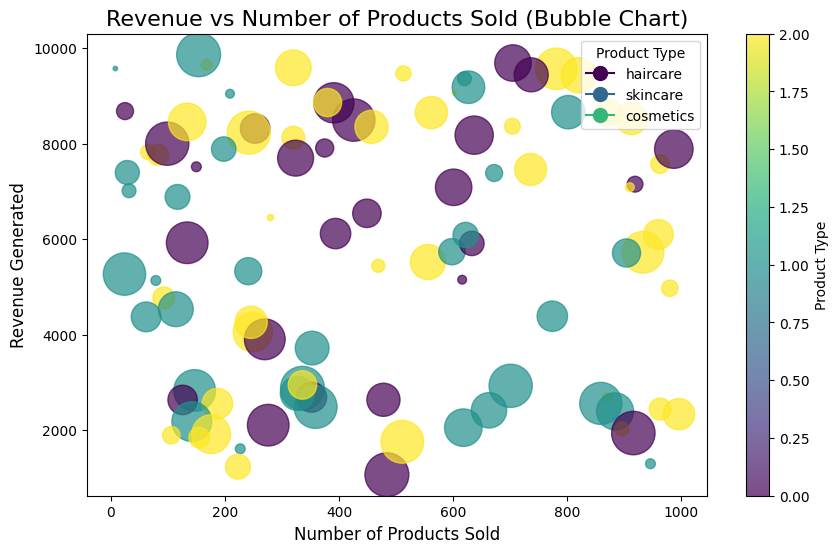

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.lines as mlines

# Assuming 'data' is a pandas DataFrame containing the given data
data = pd.read_csv('/content/drive/MyDrive/supply_chain_data.csv')

# Plot
plt.figure(figsize=(10, 6))

# Create a color map for the product type (using categorical mapping)
cmap = plt.get_cmap('viridis')  # You can choose any other colormap here

# Mapping product types to numeric codes for coloring
product_type_codes = data['Product type'].astype('category').cat.codes

# Creating the bubble chart:
# x-axis as Number of Products Sold
# y-axis as Revenue Generated
# size of bubbles based on Stock Levels
# color based on Product Type
scatter = plt.scatter(data['Number of products sold'], data['Revenue generated'],
                      s=data['Stock levels']*10,  # Scale the size for better visibility
                      c=product_type_codes,
                      cmap=cmap, alpha=0.7)

# Add titles and labels
plt.title("Revenue vs Number of Products Sold (Bubble Chart)", fontsize=16)
plt.xlabel('Number of Products Sold', fontsize=12)
plt.ylabel('Revenue Generated', fontsize=12)

# Add a color bar legend for product type
cbar = plt.colorbar(scatter)
cbar.set_label('Product Type')

# Create a custom legend for bubble size (based on Stock Level)
size_legend = [mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=5, label=f'Stock Level: {i}') for i in [10, 50, 100]]
plt.legend(handles=size_legend, title="Stock Level", loc='upper left')

# Custom legend for product type using the color map and labels
from matplotlib import cm
import numpy as np

# Getting unique product types
unique_product_types = data['Product type'].unique()
colors = [cmap(i / len(unique_product_types)) for i in range(len(unique_product_types))]

# Creating a custom legend for the product types
product_type_legend = [mlines.Line2D([0], [0], marker='o', color=colors[i], markersize=10, label=unique_product_types[i]) for i in range(len(unique_product_types))]
plt.legend(handles=product_type_legend, title="Product Type", loc='upper right')

# Show plot
plt.show()


**1. Why did you pick the specific chart?**

I chose a bubble chart because it effectively visualizes the relationship between three variables: Number of Products Sold, Revenue Generated, and Stock Levels, while also incorporating a fourth categorical variable: Product Type.  Each bubble represents a data point, its position on the chart shows the relationship between number of products sold and revenue, the size of the bubble reflects stock levels, and the color represents the product type.  This makes it easy to identify patterns and correlations between these four factors, providing richer insight compared to a simple scatter plot or bar chart.

**2. What is/are the insight(s) found from the chart?**

  **The bubble chart reveals relationships between revenue, number of products sold, stock levels, and product types. Insights gained are:**

 **1. Revenue and Sales Volume Correlation:**  The chart shows the correlation between revenue generated and the number of products sold.  Bubbles positioned towards the top right generally indicate higher sales volumes and higher revenue.

 **2. Impact of Stock Levels:** Bubble size represents stock levels. Larger bubbles suggest higher stock levels for a given product.  This allows you to see if high stock levels correlate with higher sales and revenue or if there's excess inventory in certain product types.

 **3. Product Type Performance:** The color coding of the bubbles based on product type allows you to see the performance of different product categories.  You can easily identify product types with higher revenue and sales volumes, or those that are struggling.  Comparing bubble sizes within the same color group provides insight into relative stock levels for products of the same type.

 **4. Outliers:** The bubble chart helps identify outliers—products or product types with unusual combinations of sales, revenue, and stock levels. These may require further investigation.

 **5. Product Type to Sales/Stock Relationship:** By observing the color-coded bubble clusters, you can identify if specific product types consistently have higher sales volume, higher stock, or higher revenue, indicating insights into sales patterns and inventory management strategies.

 **Example Interpretation:**
 "Product type 'X' (represented by blue bubbles) generally shows higher revenue and number of products sold compared to 'Y' (represented by green bubbles).  However, some 'X' products have a larger bubble size, indicating higher stock levels, which could warrant investigation."

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

 **Positive Business Impacts from (Bubble Chart):**

 **1. Sales Performance Analysis:**
   * **Insight:** Identify products with high revenue and sales volume.
   * **Positive Impact:** Focus marketing and inventory management on these top performers.  Further investment in these products could lead to increased revenue and market share.

 **2. Inventory Optimization:**
   * **Insight:** Analyze the relationship between stock levels, sales volume, and revenue.
   * **Positive Impact:** Optimize inventory levels to minimize holding costs while ensuring sufficient stock to meet demand.  Products with high sales and revenue but low stock levels might require immediate attention.

 **3. Product Portfolio Management:**
   * **Insight:** Identify products with low sales, low revenue, or excessive stock.
   * **Positive Impact:**  Evaluate underperforming products.  Consider discontinuing products with low sales and high inventory, or explore strategies to boost sales of those products.

 **4. Pricing and Profitability:**
   * **Insight:** Understand the correlation between price (implied by revenue and sales volume) and stock levels.
   * **Positive Impact:**  Adjust pricing strategies to maximize profitability for different products.  High-revenue, high-sales products might justify higher prices, while lower-performing products might require price adjustments.

 **Negative Growth Implications from Bubble Chart:**

 **1. Oversimplification:**
   * **Insight:**  The chart shows aggregated data for product types.
   * **Negative Impact:**  Variations within product types might be hidden.  A product type might appear to be performing well overall, but some products within that type could be underperforming.

 **2. Ignoring External Factors:**
   * **Insight:** Doesn't account for external factors like seasonality or competition.
   * **Negative Impact:**  Sales and revenue can be influenced by factors outside the direct control of the business.  Decisions made solely on current data might not account for these factors.

 **3. Correlation vs. Causation:**
   * **Insight:**  The chart reveals correlations but not necessarily causal relationships.
   * **Negative Impact:**  Assuming that high stock levels *cause* higher sales or revenue might be incorrect.  The relationship could be driven by other factors. Decisions should not solely rely on observed correlations.

 **4. Limited Scope:**
   * **Insight:** Focuses on sales, revenue, and stock.
   * **Negative Impact:**  Profitability, production costs, marketing expenses, customer satisfaction are not considered.  Decisions solely based on these three factors might overlook other important aspects.


 **Overall:**
 The bubble chart provides a visual representation of sales performance, revenue, and stock levels, offering valuable insights for optimizing inventory, marketing strategies, and product portfolio. However, avoid overreliance on correlations observed in the chart without considering other factors that could be influencing sales. Deeper analysis including external influences and other business metrics is needed for informed decisions.

**chart - 11**

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')


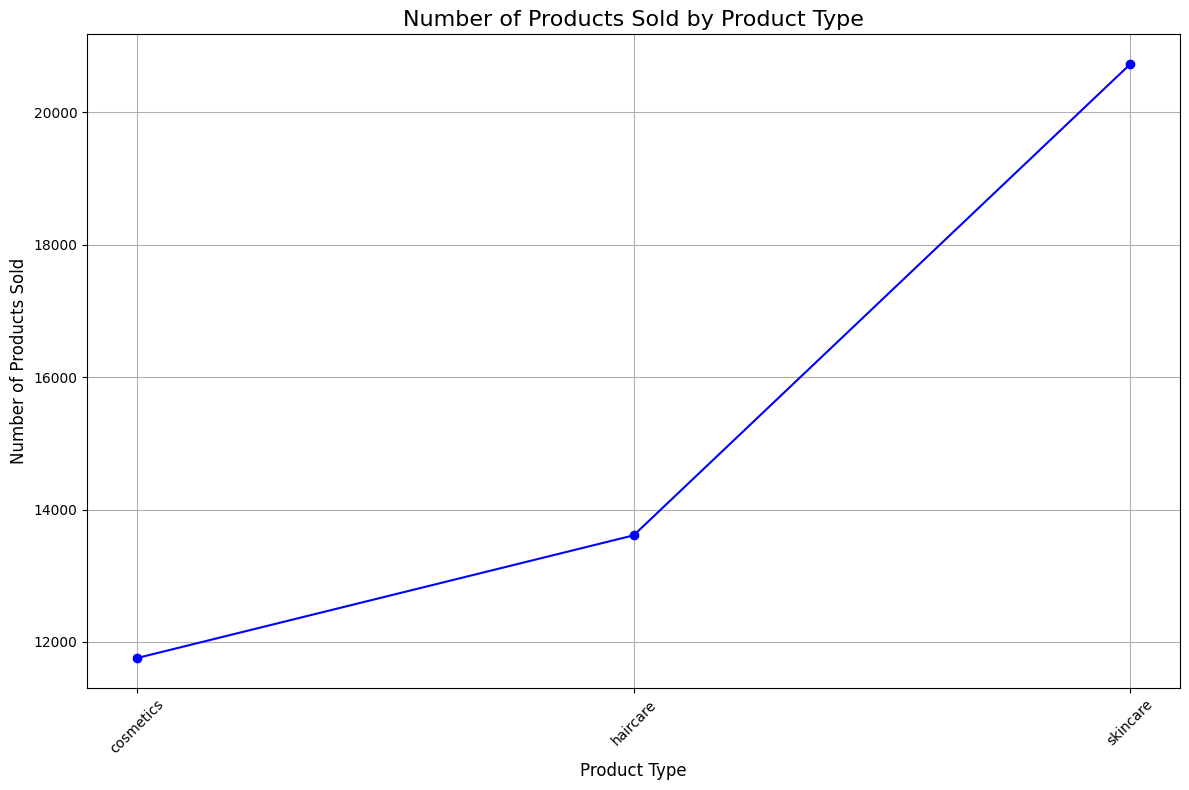

In [ ]:
# chart - 13 line chart

import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Example DataFrame (replace with your actual data)
data = pd.read_csv('/content/drive/MyDrive/supply_chain_data.csv')

# Strip any leading/trailing spaces from column names (if needed)
data.columns = data.columns.str.strip()

# Check the column names to verify
print(data.columns)

# Group data by Product Type and sum the Number of Products Sold (if it's numeric)
product_sales = data.groupby('Product type')['Number of products sold'].sum()

# Create a line chart for Product Type vs Number of Products Sold
plt.figure(figsize=(12, 8))

# Plotting the data
plt.plot(product_sales.index, product_sales.values, marker='o', linestyle='-', color='b')

# Title and axis labels
plt.title('Number of Products Sold by Product Type', fontsize=16)
plt.xlabel('Product Type', fontsize=12)
plt.ylabel('Number of Products Sold', fontsize=12)

# Rotate x-axis labels for better readability (if necessary)
plt.xticks(rotation=45)

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

 I chose a line chart to visualize the trend of the number of products sold across different product types because it effectively displays changes in sales volume over different categories.  A line chart is excellent for showing trends and comparisons between different product categories in this context.

**2. What is/are the insight(s) found from the chart?**

The line chart visualizes the total number of products sold for each product type.  Key insights include the relative sales performance of different product types and the identification of top-selling and bottom-selling categories.  For example, the chart clearly shows which product type has the highest sales volume and which ones have the lowest, allowing for direct comparison of their performance.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

 **Positive Business Impacts from (Line Chart):**

  **1. Sales Trend Analysis:**
   * **Insight:** Identify trends in sales volume for each product type over time.
   * **Positive Impact:** Observe if sales are increasing, decreasing, or stable for specific product categories.  This information can be used to forecast future demand and adjust strategies accordingly.

  **2. Product Performance Comparison:**
   * **Insight:** Compare sales trends of different product types over time.
   * **Positive Impact:** Determine which product categories are growing faster or slower than others. This allows for resource allocation, investments, and marketing strategies to focus on high-growth areas.

  **3. Seasonality Identification:**
   * **Insight:**  Detect seasonal patterns in product sales.
   * **Positive Impact:** Anticipate and prepare for seasonal fluctuations in demand.  Adjust inventory levels and marketing campaigns to match expected seasonal changes in consumer behavior.


 **Negative Growth Implications from Line Chart:**

  **1. Limited Scope:**
   * **Insight:**  Shows sales volume trends only.
   * **Negative Impact:**  Doesn't incorporate revenue, profitability, or other key business metrics.  Decisions solely based on sales volume might neglect profitability or market share considerations.

  **2. External Factors:**
   * **Insight:**  Fails to account for external factors like economic changes, competition, or new market trends.
   * **Negative Impact:**  External factors can significantly impact sales, but the line chart does not account for these.  Changes in the market can make current trends obsolete.  The chart alone may lead to strategies that are not aligned with external market forces.

  **3. Oversimplification of Trends:**
   * **Insight:**  Shows aggregate sales of product types over time.
   * **Negative Impact:**  Hides product-specific trends within each type.  An overall positive trend for "Haircare" products, for instance, could obscure individual products within that category that are underperforming.

  **4. Historical Bias:**
   * **Insight:** Represents past performance only.
   * **Negative Impact:**  Might not be indicative of future performance.  Trends change, and decisions based on past sales data alone may not predict future trends.



 **Overall:**
  The line chart provides a useful view of sales trends over time.  It is valuable for identifying growth patterns, comparing product performance, and understanding seasonality.  However, relying solely on the line chart for business decisions is unwise. Supplement the line chart with revenue data, profitability analysis, external market research, and other business indicators for more effective and informed decisions.

**Chart - 12**

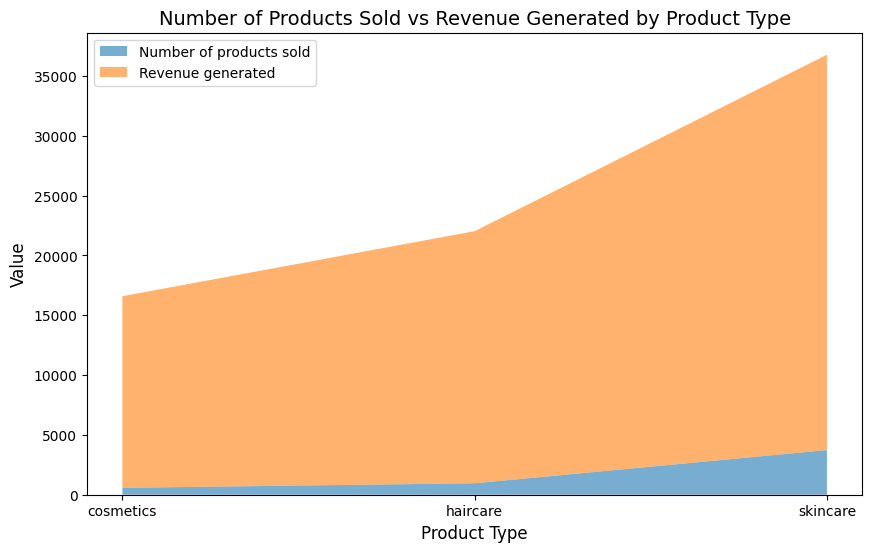

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (you can replace this with your actual data)
data = {
    'Product type': ['haircare', 'skincare', 'haircare', 'skincare', 'skincare', 'haircare', 'skincare', 'cosmetics', 'cosmetics', 'skincare', 'skincare'],
    'Number of products sold': [802, 736, 8, 83, 871, 147, 65, 426, 150, 980, 996],
    'Revenue generated': [8661.996792, 7460.900065, 9577.749626, 7766.836426, 2686.505152, 2828.348746, 7823.47656, 8496.103813, 7517.363211, 4971.145988, 2330.965802]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Group by Product type and sum the values
df_grouped = df.groupby('Product type').sum()

# Create the stacked area chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the stacked areas
ax.stackplot(df_grouped.index, df_grouped['Number of products sold'], df_grouped['Revenue generated'], labels=['Number of products sold', 'Revenue generated'], alpha=0.6)

# Add labels and title
ax.set_title('Number of Products Sold vs Revenue Generated by Product Type', fontsize=14)
ax.set_xlabel('Product Type', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.legend(loc='upper left')

plt.show()

**1. Why did you pick the specific chart?**

 **The stacked area chart was chosen to visualize the relationship between "Number of products sold" and "Revenue generated" across different product types.  Here's why it's a suitable choice:**

* **Shows the contribution of each metric to the total:**  The stacked area chart effectively displays how much each metric (number of products sold and revenue) contributes to the overall total for each product type.  This allows for a direct comparison of the relative importance of sales volume versus revenue generation for each product category.  You can see at a glance whether high sales volume translates to high revenue or if there are discrepancies.

* **Visualizes trends and changes over categories:** While the provided code doesn't have a time component (the x-axis is just product type), the chart still makes it easy to visually compare how the two metrics change across product categories.  If you were to adapt this to include time on the x-axis, it would clearly reveal trends over time for each metric within each product category.


* **Communicates the combined impact:** The total area for each product type represents the sum of the "Number of products sold" and "Revenue generated". This provides a visual representation of overall performance for each category.


Other chart types, such as separate line graphs or bar charts, could visualize the data, but they wouldn't effectively show the combined contribution of both variables to the total for each product type in a clear way.  The stacked area chart provides that combined view.

**2. What is/are the insight(s) found from the chart?**

 **Insights from the stacked area chart:**

 **1. Product Type Performance Comparison:** The chart allows for a direct comparison of the number of products sold and the revenue generated for each product type (haircare, skincare, cosmetics).  You can visually see which product type contributes the most to both sales volume and revenue.

 **2. Relationship between Sales Volume and Revenue:**  The chart shows the relationship between the number of products sold and the revenue generated for each product type.  For example, a product type might have high sales volume but lower revenue, suggesting lower profit margins or lower prices.  Conversely, a product type might generate high revenue with lower sales volume, indicating higher-priced items or better profit margins.

 **3. Identifying High-Performing and Low-Performing Product Types:** The stacked areas clearly highlight the product types that are driving both sales volume and revenue. You can easily identify the top performers and the ones that are underperforming in terms of both metrics.  This makes it simple to see which product categories are most successful.

 **4. Overall Sales and Revenue Trends:** The stacked area chart provides a visual overview of overall sales volume and revenue trends across the different product types. You can see if there's a general upward or downward trend for specific product categories or the overall business.

 **Example Insight:** If the 'haircare' category shows a large area for 'Number of Products Sold' but a comparatively smaller area for 'Revenue Generated', it could imply that haircare products have lower average selling prices or lower profit margins compared to other categories.  This would prompt further investigation.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

  **Positive Business Impacts (Stacked Area Chart - Products vs Revenue):**

 **1. Product Performance Analysis:**

 **Insight:** Visual comparison of the number of products sold and revenue generated for each product type.

 **Positive Impact:** Identify product types with high sales volume but potentially lower revenue (indicating lower profit margins) or high revenue but lower sales volume (indicating premium pricing or smaller target markets). Optimize pricing and production strategies accordingly.

 **2. Resource Allocation:**

 **Insight:** Observe the relationship between sales volume and revenue across product types.

 **Positive Impact:** Allocate resources (marketing, production, inventory) based on both sales volume and revenue generation.  Prioritize product types with high revenue and high volume. Reduce resources for those with low revenue and volume, or strategically increase marketing to boost sales for potentially profitable types.

 **3. Product Portfolio Optimization:**

 **Insight:** Identify underperforming product types in terms of both sales volume and revenue.

 **Positive Impact:**  Evaluate underperforming products. Consider discontinuing or revamping low-performing product types to free up resources for high-performing ones.

 **4. Pricing Strategy:**

 **Insight:** Compare the revenue generated by product type relative to the number sold.

 **Positive Impact:** Fine-tune pricing strategies. If a product type has high revenue but low volume, consider if a slight price decrease could stimulate sales and increase overall profit.  If a product type has high volume but low revenue, investigate opportunities to either improve quality or reposition its pricing to generate more revenue per unit.


 **Negative Growth Implications (Stacked Area Chart):**

 **1. Misinterpretation of Combined Data:**

 **Insight:** Difficulty in separating the individual effects of sales volume and revenue.

 **Negative Impact:**  Over-reliance on the combined visualization without separate analysis could lead to incorrect decisions. For example, a product type might appear strong overall, but have a low revenue per unit.

 **2. Ignoring Underlying Factors:**

 **Insight:** The chart doesn't directly reveal the reasons behind sales volume and revenue.

 **Negative Impact:** External factors (market competition, seasonal trends, promotions) can influence the combined figures. Decisions based solely on the visualization might be misleading.

 **3. Overemphasis on Combined Metrics:**

 **Insight:** Focusing only on the total stacked area without considering each factor's contribution.

 **Negative Impact:** Neglecting to analyze individual components (sales volume or revenue separately) could result in poor strategic decisions. For example, a product type with high revenue but very low volume may seem lucrative on the chart, but could be unsustainable in the long term.

**Chart - 13**

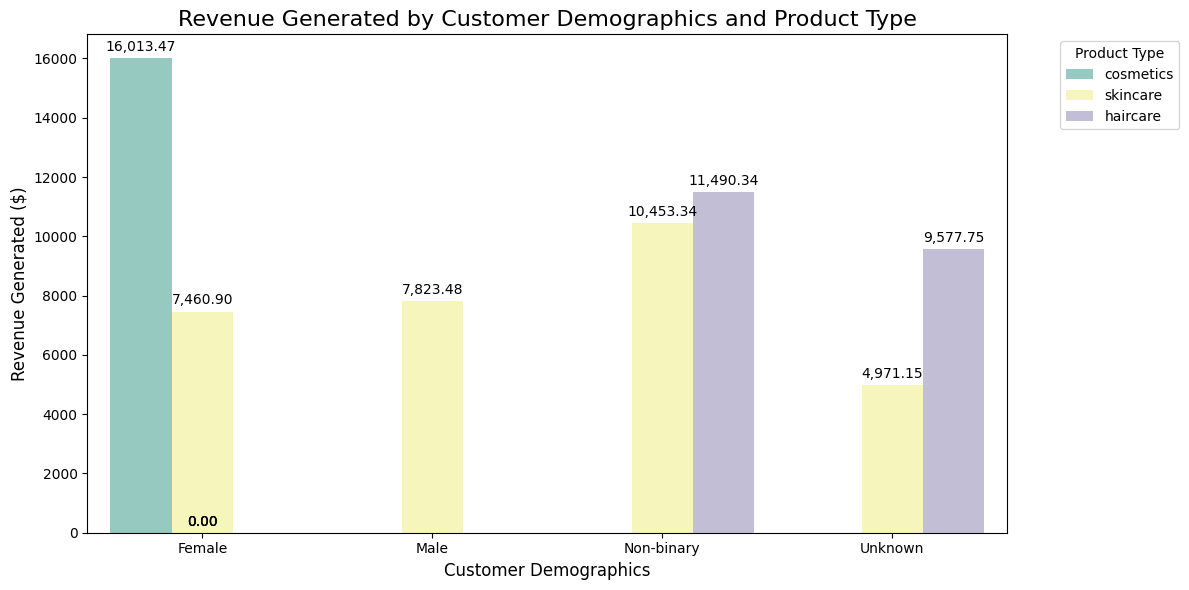

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame (same data as before)
data = {
    'Product type': ['haircare', 'skincare', 'haircare', 'skincare', 'skincare', 'haircare', 'skincare', 'cosmetics', 'cosmetics', 'skincare'],
    'Price': [69.808, 14.843, 11.319, 61.163, 4.805, 1.699, 4.078, 42.958, 68.717, 64.015],
    'Number of products sold': [802, 736, 8, 83, 871, 147, 65, 426, 150, 980],
    'Revenue generated': [8661.996, 7460.900, 9577.749, 7766.836, 2686.505, 2828.348, 7823.476, 8496.103, 7517.363, 4971.145],
    'Stock levels': [58, 53, 1, 23, 5, 90, 11, 93, 5, 14],
    'Lead times': [7, 30, 10, 13, 3, 27, 15, 17, 10, 27],
    'Shipping times': [96, 37, 88, 59, 56, 66, 58, 11, 15, 83],
    'Shipping costs': [2.956, 9.716, 8.054, 1.729, 3.890, 4.444, 3.880, 2.348, 3.404, 7.166],
    'Customer demographics': ['Non-binary', 'Female', 'Unknown', 'Non-binary', 'Non-binary', 'Non-binary', 'Male', 'Female', 'Female', 'Unknown']
}

# Create DataFrame
df = pd.DataFrame(data)

# Group by 'Customer demographics' and 'Product type' and sum the 'Revenue generated'
grouped_data = df.groupby(['Customer demographics', 'Product type'])['Revenue generated'].sum().reset_index()

# Create a colorful grouped bar chart using Seaborn with a custom palette
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer demographics', y='Revenue generated', hue='Product type', data=grouped_data, palette="Set3")

# Customize the chart
plt.title('Revenue Generated by Customer Demographics and Product Type', fontsize=16)
plt.xlabel('Customer Demographics', fontsize=12)
plt.ylabel('Revenue Generated ($)', fontsize=12)
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate bars with the revenue values
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                       textcoords='offset points')

# Display the chart with tight layout
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

  I chose a grouped bar chart to visualize the revenue generated by different customer demographics and product types.  A grouped bar chart effectively compares the revenue generated across different demographics, with each group further broken down by product type.  This allows for easy comparison of revenues between different customer segments (e.g., Male vs. Female vs. Non-binary) and how those segments perform across the various product types.  The grouping provides a clear view of the relationship between customer demographics and product type.

**2. What is/are the insight(s) found from the chart?**

**Insights from the grouped bar chart (Revenue by Customer Demographics and Product Type):**

* **Revenue by Demographics and Product Type:** The chart directly compares revenue generated for each product type (haircare, skincare, cosmetics) within different customer demographic groups (Female, Male, Non-binary, Unknown).  The height of each bar represents the total revenue.
* **Top-Performing Product-Demographic Combinations:**  Identify the product-demographic combinations that generate the highest revenue. This reveals which products resonate most with specific customer segments.
* **Demographic Preferences:** Understand which product types are preferred by each demographic group.  For example, if skincare products generate higher revenue among Females, it suggests a strong preference for skincare in that demographic.
* **Growth Opportunities:** Discover demographic segments and product types with relatively lower revenue, suggesting potential growth areas.  Analyzing the reasons for lower performance in those areas can provide actionable insights.
* **Targeted Marketing Strategies:** The insights guide targeted marketing campaigns.  Tailor marketing efforts to resonate with each demographic group's preferred product types.
* **Product Development:**  Identify unmet needs or gaps in the product offerings for particular demographics.  For example, if a demographic shows lower engagement with a certain product category, consider developing products tailored to their needs or preferences.

**Example Insights:** If the chart shows that "skincare" products generate the highest revenue within the "Female" demographic, you could focus your marketing efforts for skincare products on this segment.  If "haircare" products perform lower within the "Male" segment, research why and consider creating haircare products or marketing campaigns more suited to that demographic's needs.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

 **Positive Business Impacts (Grouped Bar Chart - Revenue by Demographics and Product Type):**
  
  **1. Targeted Marketing Campaigns:**

  **Insight:** Identify customer demographics with high revenue for specific product types (e.g., high revenue from skincare products for non-binary customers).

  **Positive Impact:** Develop targeted marketing campaigns focusing on the preferences of each demographic. Tailor messaging and visuals to resonate better with their specific needs and interests. This will increase ad engagement and sales conversion.

  **2. Product Development and Expansion:**

  **Insight:**  Discover product types with high revenue within specific demographics (e.g., high revenue for cosmetics for female customers).

  **Positive Impact:** Expand product lines or develop new products tailored for those successful combinations. If a particular product type is popular with a demographic, consider related products that could also resonate with them.

  **3. Inventory Management:**

  **Insight:** Understand which products generate the highest revenue among different customer groups.

  **Positive Impact:** Optimize stock levels of specific product types based on demographic-specific demand. Ensuring sufficient stock for high-performing products and minimizing inventory costs for underperforming items.

  **4. Customer Segmentation:**

  **Insight:** The chart provides data for better customer segmentation.

  **Positive Impact:** Create distinct customer segments with similar preferences and purchasing behaviors. This helps to personalize experiences, send targeted promotions and offers, and personalize marketing messages, leading to increased loyalty and sales.


  **Negative Growth Implications (Grouped Bar Chart - Revenue by Demographics and Product Type):**
  
  **1. Neglecting Underperforming Segments:**

  **Insight:** Ignoring customer groups with low revenue for certain products.

  **Negative Impact:** Missing out on potential growth opportunities. A segment might seem underperforming overall, but a closer look might reveal profitable sub-segments within that group that haven't been adequately addressed.

  **2. Stereotyping Customer Groups:**

  **Insight:** Basing decisions solely on broad demographic trends.

  **Negative Impact:**  Making assumptions about all members of a demographic based on aggregated data.  Diversity exists within each demographic, and generalized marketing might alienate a sub-segment and lead to missed opportunities.
  
  **3. Misallocation of Resources:**

  **Insight:** Incorrectly allocating marketing or inventory budgets based on revenue figures alone.

  **Negative Impact:** Over-investing in already successful segments and neglecting other areas with potentially higher returns.  Without a comprehensive analysis, misallocation can occur.

  **4. Ignoring External Factors:**

  **Insight:** Not considering external influences.

  **Negative Impact:**  A group's revenue might be impacted by external factors (seasonality, economic climate) that aren't reflected in the chart.  Decisions made solely on the visual data could be shortsighted.

**Chart - 14**

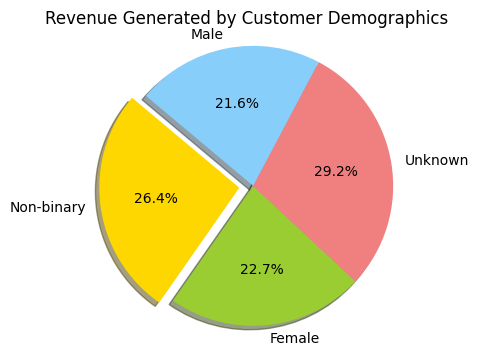

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for the chart
data = {
    'Customer demographics': ['Non-binary', 'Female', 'Unknown', 'Male'],
    'Revenue generated': [8661.996792, 7460.900065, 9577.749626, 7095.876634]  # Summed revenue per demographic
}

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

df = pd.DataFrame(data)

# Explode effect: 0 means no explosion, 0.1 means the slice will be 'exploded'
explode = (0.1, 0, 0, 0)  # Exploding the 'Non-binary' segment

# Pie chart plotting with explode effect and shadow
plt.figure(figsize=(5, 4))
plt.pie(df['Revenue generated'], labels=df['Customer demographics'], colors=colors, autopct='%1.1f%%',
        startangle=140, explode=explode, shadow=True)
plt.title("Revenue Generated by Customer Demographics")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**1. Why did you pick the specific chart?**

  I chose a pie chart to visualize the distribution of revenue generated by different customer demographics.  A pie chart effectively shows the proportion of the total revenue that each demographic contributes. This makes it easy to quickly identify which customer groups are the most significant revenue drivers.  It clearly illustrates the relative proportions of revenue from each segment.

**2. What is/are the insight(s) found from the chart?**

 **Insights from the pie chart (Revenue Generated by Customer Demographics):**

 **1. Revenue Distribution:** Understand how revenue is distributed across different customer demographics.  The pie chart clearly shows the proportion of total revenue generated by each demographic group.

 **2. Top Performing Demographics:** Identify the customer demographics that contribute the most to the total revenue. The largest slice of the pie represents the demographic generating the highest revenue.

 **3. Low Performing Demographics:** Identify customer demographics with lower revenue contributions. Smaller slices represent demographics that generate less revenue.

 **4. Comparison of Segments:** Compare the revenue generated by different demographic segments to understand relative performance.

 **Example Insights (based on the sample data):**

 * 'Unknown' customer demographics are generating the highest revenue.
 * 'Non-binary' customer demographics are also generating a significant portion of the total revenue.
 * 'Female' and 'Male' customer demographics have generated comparatively lower revenue.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

  **Positive Business Impacts (Pie Chart - Revenue by Customer Demographics):**

 **1. Targeted Marketing:**

 **Insight:** Identify customer demographics with the highest revenue contribution.

 **Positive Impact:** Allocate marketing resources effectively towards demographics with high revenue generation.  Develop targeted campaigns for each segment that speak to their specific needs and preferences.  Optimize ad spend for maximum ROI.

 **2. Product Development:**

  **Insight:** Understand the purchasing behaviors of different demographics.

 **Positive Impact:**  Develop products and services tailored to the preferences and needs of the highest-revenue-generating segments.  This can drive increased sales and customer satisfaction.  Expand product lines to cater to unmet needs of lucrative demographics.

 **3. Customer Relationship Management (CRM):**

 **Insight:** Recognize underperforming demographic segments.

 **Positive Impact:** Develop strategies to improve engagement and conversion rates among underperforming demographics. Implement personalized outreach programs, incentives or targeted offers to address their needs and preferences.  Increase customer retention through enhanced customer service strategies.

 **Negative Growth Implications (Pie Chart - Revenue by Customer Demographics):**

 **1. Discrimination or Bias:**

 **Insight:** Overlooking or neglecting smaller demographic segments.

 **Negative Impact:** Failing to address the needs of smaller demographics could result in missed business opportunities and negative brand perception.  Discriminatory practices based on demographic data could lead to reputational damage.

 **2. Misinterpretation of Data:**

 **Insight:** Incorrectly interpreting the pie chart without considering other relevant factors.

 **Negative Impact:** Drawing conclusions based solely on revenue share might not account for factors such as customer lifetime value, profitability, or the potential for future growth within each segment.  Focusing solely on current revenue might prevent the identification of future growth opportunities within apparently smaller segments.

 **3. Overemphasis on Dominant Demographics:**

 **Insight:** Over-investing in already successful demographics.

 **Negative Impact:** Ignoring potential growth in other segments might lead to a lack of market diversification. Relying too heavily on a single segment makes the business vulnerable to changes in that segment’s preferences or market dynamics.


 **4. Ignoring External Factors:**

 **Insight:** Failing to consider external influences (e.g., economic downturn, cultural shifts).

 **Negative Impact:** External factors may significantly impact customer purchasing power and behavior.  A decline in the overall economic condition or shift in customer preferences can render the revenue generated by a specific demographic less reliable in the long run.

**Chart - 15 Correlation Heatmap**

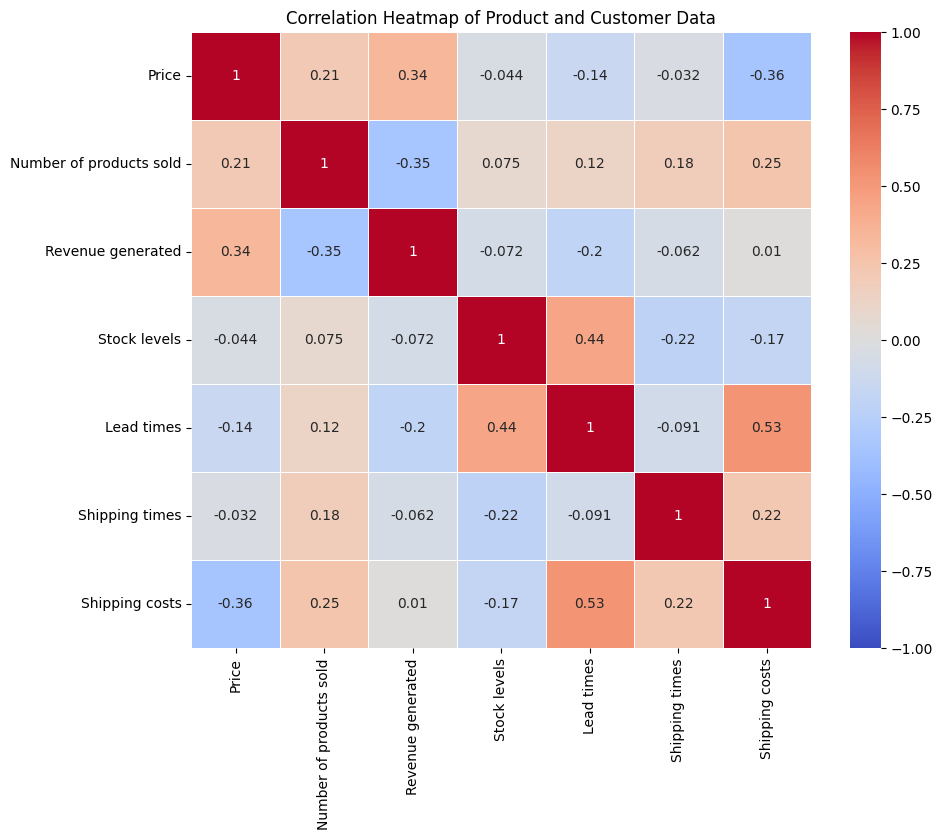

In [ ]:
# Correlation Heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is already in a pandas DataFrame
data = {
    'Product type': ['haircare', 'skincare', 'haircare', 'skincare', 'skincare', 'haircare', 'skincare', 'cosmetics', 'cosmetics', 'skincare'],
    'Price': [69.808, 14.843, 11.319, 61.163, 4.805, 1.699, 4.078, 42.958, 68.717, 64.015],
    'Number of products sold': [802, 736, 8, 83, 871, 147, 65, 426, 150, 980],
    'Revenue generated': [8661.996, 7460.900, 9577.749, 7766.836, 2686.505, 2828.348, 7823.476, 8496.103, 7517.363, 4971.145],
    'Stock levels': [58, 53, 1, 23, 5, 90, 11, 93, 5, 14],
    'Lead times': [7, 30, 10, 13, 3, 27, 15, 17, 10, 27],
    'Shipping times': [96, 37, 88, 59, 56, 66, 58, 11, 15, 83],
    'Shipping costs': [2.956, 9.716, 8.054, 1.729, 3.890, 4.444, 3.880, 2.348, 3.404, 7.166],
    'Customer demographics': ['Non-binary', 'Female', 'Unknown', 'Non-binary', 'Non-binary', 'Non-binary', 'Male', 'Female', 'Female', 'Unknown']
}

# Create DataFrame
df = pd.DataFrame(data)

# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Product and Customer Data')
plt.show()

**1. Why did you pick the specific chart?**

  I chose a correlation heatmap to visualize the relationships between different numerical variables in the product and customer datasets. A heatmap effectively displays the correlation coefficients between pairs of variables using color intensity. This allows for quick identification of strong positive, strong negative, and weak correlations. It provides a compact and easily interpretable view of how various numerical factors relate to each other.

**2. What is/are the insight(s) found from the chart?**

 **Insights from the correlation heatmap**

   - **Strong Positive Correlations:** Look for cells with bright colors (e.g., reds in the "coolwarm" colormap).  A strong positive correlation between two variables suggests they tend to increase or decrease together.  For example, if "Price" and "Revenue Generated" are strongly positively correlated, it suggests that higher-priced products often generate more revenue.
   - **Strong Negative Correlations:** Look for cells with dark colors (e.g., blues in the "coolwarm" colormap). A strong negative correlation means that as one variable increases, the other tends to decrease.  For example, a strong negative correlation between "Stock Levels" and "Lead Times" might indicate that products with low stock levels often have longer lead times.
   - **Weak Correlations:** Cells with near-neutral colors (e.g., white or light colors) represent weak correlations.  If two variables have a weak correlation, there isn't a clear linear relationship between them.
   - **Perfect Correlations:** The diagonal line always shows a perfect correlation (1.0) because a variable is perfectly correlated with itself.

   You would then interpret the relationships and draw conclusions from them.

**Chart - 16 Pair Plot**

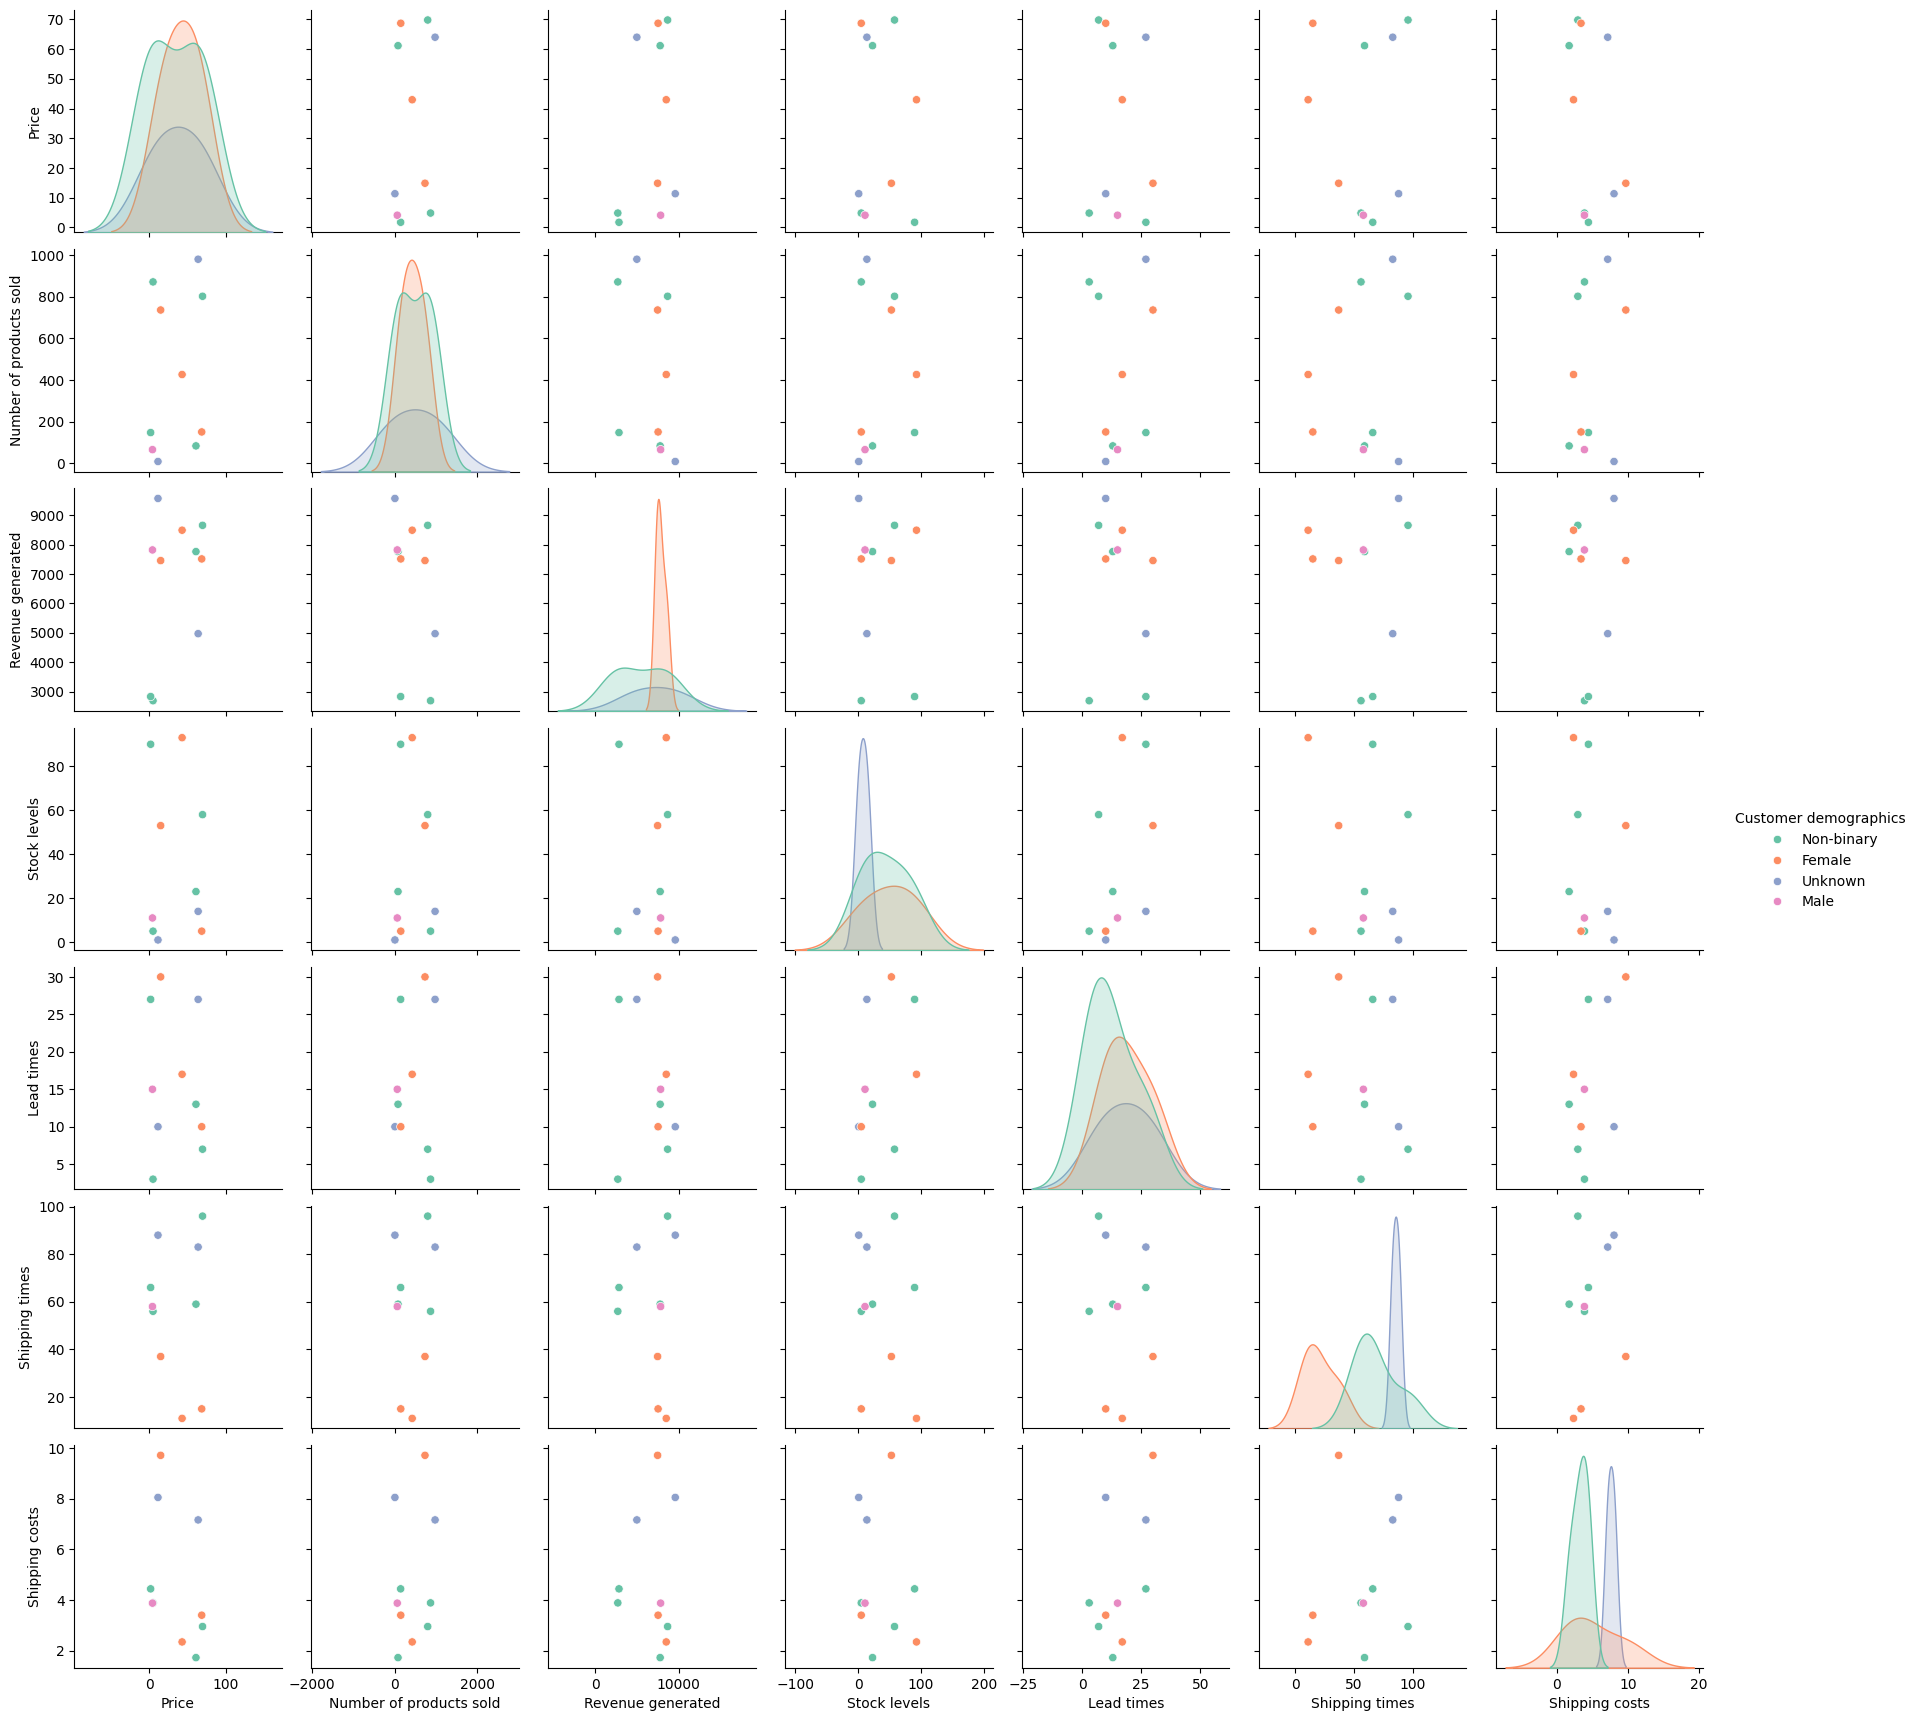

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is already in a CSV format or a pandas DataFrame
data = {
    'Product type': ['haircare', 'skincare', 'haircare', 'skincare', 'skincare', 'haircare', 'skincare', 'cosmetics', 'cosmetics', 'skincare'],
    'Price': [69.808, 14.843, 11.319, 61.163, 4.805, 1.699, 4.078, 42.958, 68.717, 64.015],
    'Number of products sold': [802, 736, 8, 83, 871, 147, 65, 426, 150, 980],
    'Revenue generated': [8661.996, 7460.900, 9577.749, 7766.836, 2686.505, 2828.348, 7823.476, 8496.103, 7517.363, 4971.145],
    'Stock levels': [58, 53, 1, 23, 5, 90, 11, 93, 5, 14],
    'Lead times': [7, 30, 10, 13, 3, 27, 15, 17, 10, 27],
    'Shipping times': [96, 37, 88, 59, 56, 66, 58, 11, 15, 83],
    'Shipping costs': [2.956, 9.716, 8.054, 1.729, 3.890, 4.444, 3.880, 2.348, 3.404, 7.166],
    'Customer demographics': ['Non-binary', 'Female', 'Unknown', 'Non-binary', 'Non-binary', 'Non-binary', 'Male', 'Female', 'Female', 'Unknown']
}

df = pd.DataFrame(data)

# Plot pairplot with Customer demographics as hue
sns.pairplot(df, hue='Customer demographics', palette='Set2')
plt.show()

**1. Why did you pick the specific chart?**

  I chose a pair plot to visualize the relationships between multiple numerical variables in the dataset, with the added dimension of customer demographics as the hue.  A pair plot generates a matrix of scatter plots, where each off-diagonal element shows the relationship between two different variables, and the diagonal elements show the distribution of each individual variable.  The color-coding by customer demographics allows for comparison of the distribution of variables across different demographic groups. This visualization makes it possible to identify patterns, correlations, and clusters in the data based on demographic segments.

**2. What is/are the insight(s) found from the chart?**

 **Insights from the pair plot (Product Performance and Customer Demographics):**

 **1. Relationships between Variables:**

   * Observe the relationships between pairs of variables, such as Price vs. Number of products sold, Price vs. Revenue generated, etc.
   * Identify positive or negative correlations, or no correlation between the pairs.
   * Look for potential clusters or patterns in the data for each customer demographic.

 **2. Impact of Customer Demographics:**
   * Observe how different customer demographics influence the relationships between variables.
   * See if there are differences in purchasing patterns or product preferences among different customer demographics. For example, do different demographics show different price sensitivity?
   * Analyze if specific products attract certain demographics.

 **3. Product Performance:**
  * Examine relationships between product attributes (price, number of products sold, stock levels, lead times, etc.).
  * Identify products that are popular (high number sold) or profitable (high revenue).
  * Analyze correlations between sales, price, and stock levels.

 **Example Insights :**

  * Products with higher prices may generate higher revenue, but the number of products sold might be lower (price sensitivity).
 * Different customer demographics might have different preferences for price points or specific products. For example, one demographic might prefer high-priced products, and another might prefer products with lower prices.
 * Customer preferences may be reflected in stock levels; popular items among certain demographics may have lower stock levels.
 * There might be an inverse correlation between shipping costs and the number of products sold. For example, if shipping costs are high, customers might be less inclined to buy large quantities of items.



**Conclusion**

 In conclusion, the analysis of sales data reveals key insights into customer behavior and product performance, offering opportunities for positive business impact but also highlighting potential risks of negative growth.  Targeted marketing campaigns tailored to high-revenue demographics, coupled with product development aligned with successful demographic-product combinations, can drive sales and optimize inventory.  However, neglecting underperforming segments or relying solely on broad demographic trends risks overlooking opportunities and misallocating resources.  External factors and the inherent diversity within demographics must also be considered to avoid short-sighted decisions and ensure sustainable growth.  Visualizations like grouped bar charts and pie charts highlight revenue distribution across demographics and product types, while heatmaps and pair plots unveil correlations between numerical variables and their relationships with demographics, offering a deeper understanding for more effective strategies.